# Introduction

This project shows: 
- ability of writing solid,structured Python code 
- ability of using existing utilities(libraries) for processing and analyzing data.
- statistical analysis application
- exploratory analysis application
- analytical and data pre-processing skills

Project involves:
1. Data pre-processing
2. Exploratory Analysis
3. Statistical Analysis

Project of the training course "[Specialist in Data Science](https://practicum.yandex.com/data-scientist)" by [Yandex Practicum](https://practicum.yandex.com/).

Libraries that I have used in this project:

 |Library           |Version            |
 |:---------------|:------------------------|
|Pandas      | 0.25.1                |
|Numpy        |1.18.3              |
|matplotlib        |3.1.0                |
|seaborn       |0.11.0              |
|scipy         |1.4.1 |

# Setting up the project

In [1]:
%%html
<style>
table {float:left}
</style>

## Importing libraries

In [2]:
import pandas as pd
import numpy as np
import warnings
# Для чтения файла
import os 
from pathlib import Path
import urllib
# Для визуализации графиков
import matplotlib.pyplot as plt
import seaborn as sns
# Для проверки гипотез
from scipy import stats as st

## Setting up matplotlib

In [3]:
%matplotlib inline
small, medium, large = 14, 16, 22
params = {'figure.figsize':   (14, 5),
          'figure.titlesize': medium,
          'legend.fontsize':  small,
          'axes.titlesize':   small,
          'axes.labelsize':   small,
          'xtick.labelsize':  small,
          'ytick.labelsize':  small,
          'legend.loc':       'best'}
plt.rcParams.update(params)

In [4]:
# increasing the resolution
%config InlineBackend.figure_format = 'retina'

In [5]:
# disable warnigns
warnings.filterwarnings('ignore')

In [6]:
# removing exponential notation
pd.options.display.float_format = '{:.3f}'.format

In [7]:
# displaying all columns
pd.set_option('display.max_columns', None)

# Combined Project

# Project "Pattern identification that determine success of the game"

## Project description
We have open-source data on game sales, user and expert ratings, genres ,and platforms. We need to help the global online game store to find a potentially popular product, which will allow them to plan advertising campaigns.

## Data description
Data is from open sources 2016 - historical game sales data: user and expert ratings, country sales, genres and platforms, [ESRB ratings](https://en.wikipedia.org/wiki/Entertainment_Software_Rating_Board)

## Objective
We need to identify patterns that determine the success of the game. 

## Work plan
1. [Overview of data](#review)
2. [Data preprocessing](#data-preprocessing)
    * [Column processing](#columns)
    * [Missing values](#missingValues)
    * [Duplicate values](#duplicatedValues)
    * [Changing data types](#changingDataTypes)
    * [Abnormal values](#abnormalValues1)
    * [Extra data preparation](#extraDataPreparation)
3. [Exploratory Data Analysis](#eda)
    * [How many games were released in different years](#howManyPerYear)
    * [How sales changed by platform](#diffPlatformPerSales)
    * [Determining the actual period](#demandPeriod)
    * [Leading platforms, search for prospective platforms](#leaderPlatform&SearchProspective)
    * [Distribution of global sales by platform](#distGlobalSalesPerPlatform)
    * [The impact of user and critic feedback on sales](#userCritcScoreImpact)
    * [Distribution of games by genre](#gameDistPerGenre)
4. [Statistical Data Analysis](#sda)
    * [User portrait](#userPortrait)
    * [Top 5 popular platforms by region](#top5_platforms_regions)
    * [Top 5 popular genres by region](#top_5_genres_regions)
    * [Does the ESRB rating affect sales?](#esrb_impact_sales)
5. [Hypotheses test](#hypotheses)
    * [Average user ratings for Xbox One and PC platforms are equal](#averageUserScore_XOne_PC)
    * [Average user ratings for Action and Sports genres are different](#averageUserScore_Action_Sports)
6. [Results](#results)

<br>

<a id="review"></a>
# Stage 1 - Overview of data

Reading the data and saving it in appropriate variable.

In [8]:
Path('datasets').mkdir(parents=True, exist_ok=True)

def get_file(file_name, url):
    # Check if there is a file
    if not os.path.exists(file_name):
        print(file_name,'cannot find file, file will be downloaded from URL link')
        # download the file from the url link, put it in the path file_name
        # load data using the urllib library
        _ = urllib.request.urlretrieve(url, file_name)

# Dictionary with the file name and a URL link to it
urls = {
    'data': ('datasets/games.csv', '_________________')
}
[get_file(*urls[k]) for k in urls]
[get_file(urls[k][0], urls[k][1]) for k in urls]

# save the dataframe from the file to "game_stats"
games_stats = pd.read_csv(urls['data'][0],sep=',')

Let's look at our data. Display the first 10 lines.

In [9]:
pd.set_option('display.max_columns', None)
games_stats.head(10)

,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
0,Wii Sports,Wii,2006.000,Sports,41.360,28.960,3.770,8.450,76.000,8,E
1,Super Mario Bros.,NES,1985.000,Platform,29.080,3.580,6.810,0.770,nan,NaN,NaN
2,Mario Kart Wii,Wii,2008.000,Racing,15.680,12.760,3.790,3.290,82.000,8.3,E
3,Wii Sports Resort,Wii,2009.000,Sports,15.610,10.930,3.280,2.950,80.000,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.000,Role-Playing,11.270,8.890,10.220,1.000,nan,NaN,NaN
5,Tetris,GB,1989.000,Puzzle,23.200,2.260,4.220,0.580,nan,NaN,NaN
6,New Super Mario Bros.,DS,2006.000,Platform,11.280,9.140,6.500,2.880,89.000,8.5,E
7,Wii Play,Wii,2006.000,Misc,13.960,9.180,2.930,2.840,58.000,6.6,E
8,New Super Mario Bros. Wii,Wii,2009.000,Platform,14.440,6.940,4.700,2.240,87.000,8.4,E
9,Duck Hunt,NES,1984.000,Shooter,26.930,0.630,0.280,0.470,nan,NaN,NaN


Display general information

In [10]:
games_stats.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
Name               16713 non-null object
Platform           16715 non-null object
Year_of_Release    16446 non-null float64
Genre              16713 non-null object
NA_sales           16715 non-null float64
EU_sales           16715 non-null float64
JP_sales           16715 non-null float64
Other_sales        16715 non-null float64
Critic_Score       8137 non-null float64
User_Score         10014 non-null object
Rating             9949 non-null object
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


Let's take a closer look at the information. There are 11 columns in the table. Data types differ between columns (`float64, object`). Columns:
* `Name` - the name of the game
* `Platform` - platform
* `Year_of_Release` - release year
* `Genre` - game genre
* `NA_sales` - North American sales (millions of copies sold)
* `EU_sales` - sales in Europe (millions of copies sold)
* JP_sales in Japan (millions of copies sold)
* `Other_sales` - sales in other countries (millions of copies sold)
* `Critic_Score` - Critic scores (maximum 100)
* `User_Score` - user rating (maximum 10)
* `Rating` - rating by the ESRB (Entertainment Software Rating Board), which determines the rating of the game and the appropriate age category


## Summary

At first glance we can see that we need to handle missing values, especially in the columns: *Critic_Score*,*User_Score*,*Rating*. Missing values tell us that we have a problem in recording data and uploading data. We need to understand the nature of missing values, what is cause of missing data. Most likely for columns *Critic_Score* and *User_Score* - skipping values is not accidental, most likely the game has not been rated by users and critics yet. It seems that there are no negative values, but we should check them. The number of values in the columns is different. Also, we should check if there are duplicates. Regarding the columns, the columns are written in different case, we need to convert all the columns in the same case. Let's pay attention to the column *Year_of_Release*, the year is written as a string , we need to change the data type. The column *User_Score* contains floating point values (*float*), although the data type of the column is *object*.  Problems to be solved:

1. Process the columns.
2. Process missing values.
3. Process duplicates, if any.
4. Replace data types.

Each row of the table presents information about a video game: title, platform, year of release, game genre, sales in countries, critics and user ratings, ESRB rating (age category).

---

<a id="data-preprocessing"></a>
# Stage 2 - Data preprocessing

Let's fix our first problems. We will handle columns and missing values, duplicates, and replace data types.

<a id="columns"></a>
## Column processing

Display all columns

In [11]:
games_stats.columns

Index(['Name', 'Platform', 'Year_of_Release', 'Genre', 'NA_sales', 'EU_sales',
       'JP_sales', 'Other_sales', 'Critic_Score', 'User_Score', 'Rating'],
      dtype='object')

In [12]:
games_stats.columns = games_stats.columns.str.lower()

Check the result

In [13]:
games_stats.columns

Index(['name', 'platform', 'year_of_release', 'genre', 'na_sales', 'eu_sales',
       'jp_sales', 'other_sales', 'critic_score', 'user_score', 'rating'],
      dtype='object')

Great! We have converted columns.

<a id="missingValues"></a>
## Missing values

Check the data for missing values. Find columns that have missing values. Let's use the *isna()* and *sum()* methods. 

In [14]:
games_stats.isna().sum()

name                  2
platform              0
year_of_release     269
genre                 2
na_sales              0
eu_sales              0
jp_sales              0
other_sales           0
critic_score       8578
user_score         6701
rating             6766
dtype: int64

A lot of missing values...We found out which columns have missing values. Let's take a closer look at the columns: *year_of_release*,*critic_score*,*user_score*,*rating* and process them. As for the 2 missing rows in the columns: *name*,*genre*, we can delete them. 

Let's write a function that will display the number of rows with missing values.

In [15]:
def checkMissingValues(columnName,df):
    print(columnName,"check for missing values, number of rows with a missing value: ",len(df[df[columnName].isna()]))

Let's also write a function that will create a dictionary.

In [16]:
def makeDict(df,columnName,by):
    return df.set_index(by)[columnName].to_dict()

Let's start with the *year_of_release* column. Display the 10 missing values, maybe we will find some patterns, and, based on those patterns, we will process the missing values.

In [17]:
games_stats[games_stats['year_of_release'].isna()].head(10)

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
183,Madden NFL 2004,PS2,nan,Sports,4.260,0.260,0.010,0.710,94.000,8.5,E
377,FIFA Soccer 2004,PS2,nan,Sports,0.590,2.360,0.040,0.510,84.000,6.4,E
456,LEGO Batman: The Videogame,Wii,nan,Action,1.800,0.970,0.000,0.290,74.000,7.9,E10+
475,wwe Smackdown vs. Raw 2006,PS2,nan,Fighting,1.570,1.020,0.000,0.410,nan,NaN,NaN
609,Space Invaders,2600,nan,Shooter,2.360,0.140,0.000,0.030,nan,NaN,NaN
627,Rock Band,X360,nan,Misc,1.930,0.330,0.000,0.210,92.000,8.2,T
657,Frogger's Adventures: Temple of the Frog,GBA,nan,Adventure,2.150,0.180,0.000,0.070,73.000,tbd,E
678,LEGO Indiana Jones: The Original Adventures,Wii,nan,Action,1.510,0.610,0.000,0.210,78.000,6.6,E10+
719,Call of Duty 3,Wii,nan,Shooter,1.170,0.840,0.000,0.230,69.000,6.7,T
805,Rock Band,Wii,nan,Misc,1.330,0.560,0.000,0.200,80.000,6.3,T


We have the name of the game. We can make a dictionary of game titles and year of release. Fill in the missing values in the *year_of_release* column with values from the dictionary. We will remove the rows with the missing value. 

Let's create a function that will return a DataFrame with rows without missing values.

In [18]:
def non_nan_column(df, column):
    return df[df[column].notna()]

In [19]:
year_of_release_non_nan = non_nan_column(games_stats,'year_of_release')

Let's create a dictionary with the name of the game and the year of release.

In [20]:
games_year_dict = makeDict(year_of_release_non_nan,'year_of_release','name')

Assign the values from the resulting dictionary to the rows with the missing *year_of_release* column.

In [21]:
games_stats['year_of_release'] = games_stats.year_of_release.fillna(games_stats.name.map(games_year_dict))

In [22]:
checkMissingValues('year_of_release',games_stats)

year_of_release check for missing values, number of rows with a missing value:  146


146 missing values... Let's delete them because they won't affect the overall result of the study. The proportion of these values is less than **1%**.

In [23]:
games_stats = games_stats.dropna(subset=['year_of_release']).reset_index(drop=True)

Let's look at the rows where there are two missing values.

In [24]:
games_stats[games_stats['name'].isna()]

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
656,NaN,GEN,1993.000,NaN,1.780,0.530,0.000,0.080,nan,NaN,NaN
14127,NaN,GEN,1993.000,NaN,0.000,0.000,0.030,0.000,nan,NaN,NaN


Remove them

In [25]:
games_stats = games_stats.dropna(subset=['name']).reset_index(drop=True)

Let's go to the *critic_score* column. Let's group the data by genre and platform, and fill in the missing values with the median. 

In [26]:
games_stats['critic_score'] = games_stats.groupby(['platform','genre'])['critic_score'].transform(lambda x: x.fillna(value=x.median()))

In [27]:
checkMissingValues('critic_score',games_stats)

critic_score check for missing values, number of rows with a missing value:  1114


We have 1114 rows with a missing value. Let's look at them.

In [28]:
games_stats[games_stats['critic_score'].isna()].head()

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
1,Super Mario Bros.,NES,1985.000,Platform,29.080,3.580,6.810,0.770,nan,NaN,NaN
4,Pokemon Red/Pokemon Blue,GB,1996.000,Role-Playing,11.270,8.890,10.220,1.000,nan,NaN,NaN
5,Tetris,GB,1989.000,Puzzle,23.200,2.260,4.220,0.580,nan,NaN,NaN
9,Duck Hunt,NES,1984.000,Shooter,26.930,0.630,0.280,0.470,nan,NaN,NaN
12,Pokemon Gold/Pokemon Silver,GB,1999.000,Role-Playing,9.000,6.180,7.200,0.710,nan,NaN,NaN


There are a lot of missing values. If we delete, we lose important information, so we need to keep the missing values. In further analysis we will filter the data.

Let's move on to the *user_score* column. Let's look at the unique values in this column.

In [29]:
games_stats['user_score'].value_counts()

tbd    2394
7.8     324
8       288
8.2     279
8.3     253
       ... 
0.9       2
0.2       2
1         2
9.7       1
0         1
Name: user_score, Length: 96, dtype: int64

Стоит обратить внимание на значение **tbd**. https://dictionary.cambridge.org/dictionary/english/tbd TBD - означает "будет определено" (To be determined) - следовательно, 2394 игр не получили оценки от пользователей. Заменим значения с *tbd* на *-1*, которая будет указывать, что данная видеоигра еще не получила оценку от пользователей.

In [30]:
games_stats.loc[games_stats['user_score'] == "tbd",'user_score'] = -1

Let's group the data by genre and platform and fill in the missing values with the median. 

In [31]:
games_stats['user_score'] = games_stats.groupby(['platform','genre'])['user_score'].transform(lambda x: x.fillna(value=x.median()))

In [32]:
checkMissingValues('user_score',games_stats)

user_score check for missing values, number of rows with a missing value:  1107


There are a lot of missing values here, too. If we delete, we lose important information, so we need to keep the missing values. In further analysis we will filter the data.

Let's consider rating column

In [33]:
games_stats['rating'].value_counts()

E       3958
T       2930
M       1554
E10+    1412
EC         8
K-A        3
RP         2
AO         1
Name: rating, dtype: int64

Let's see what these ratings mean. https://www.esrb.org/ratings-guide/ | https://en.wikipedia.org/wiki/Entertainment_Software_Rating_Board 

Let's create a dictionary with key - letter value (*E*,*T*,*M*,*E10+*,*EC*, etc.), value - age category (numeric value).

1. RP - **-1** - game has not yet received final rating from ESRB.
2. EC - **0** - games with this rating contain content aimed at preschool audience.
3. E - **1** - games with this rating contain content that the ESRB believes is "generally appropriate for all ages."
4. K-A - **1** - same as E
5. E10+ - **2** - games with this rating contain content that the ESRB believes is generally appropriate for ages 10 and up.
6. T - **3** - Games with this rating contain content that the ESRB believes is generally appropriate for people age 13 and older
7. M - **4** - games with this rating contain content that the ESRB believes is generally appropriate for people age 17 and older.
8. A0 - **5** - Games with this rating contain content that the ESRB believes is only suitable for those aged 18 and older.


In [34]:
ratingDict = {
    'RP': -1,
    'EC': 0,
    'E': 1,
    'E10+': 2,
    'T': 3,
    'M': 4,
    'A0': 5,  
}

Let's replace the values with a *K-A* rating by *E* since they mean the same age rating.

In [35]:
games_stats.loc[games_stats['rating'] == "K-A",'rating'] = 'E'

Let's take a dataframe without missing values in the *rating* column.

In [36]:
rating_non_nan = non_nan_column(games_stats,'rating').reset_index(drop=True)

Let's create a function that returns a numeric value based on a letter value. 

In [37]:
def ratingNum(row):
    rating = row['rating']
    if rating == 'RP':
        return ratingDict['RP']
    elif rating == 'EC':
        return ratingDict['EC']
    elif rating == 'E':
        return ratingDict['E']
    elif rating == 'E10+':
        return ratingDict['E10+']
    elif rating == 'T':
        return ratingDict['T']
    elif rating == 'M':
        return ratingDict['M']
    elif rating == 'A0':
        return ratingDict['A0']
    # If no letter value is found, we return the numeric value of the RP rating (the game has not yet received the final rating from the ESRB.)
    return ratingDict['RP']

In [38]:
games_stats['rating_num'] = games_stats.apply(ratingNum,axis=1)

In [39]:
rating_dict  = makeDict(rating_non_nan,'rating','name')

In [40]:
games_stats['rating'] = games_stats.rating.fillna(games_stats.name.map(rating_dict))

In [41]:
checkMissingValues('rating',games_stats)

rating check for missing values, number of rows with a missing value:  6262


Filled a small amount of data. If we delete, we will lose a lot of useful information, so we will leave out the missing values. In further analysis we will filter the data.

So let's check the results of preprocessing missing values using the set of isna() and sum() methods.

In [42]:
games_stats.isna().sum()

name                  0
platform              0
year_of_release       0
genre                 0
na_sales              0
eu_sales              0
jp_sales              0
other_sales           0
critic_score       1114
user_score         1107
rating             6262
rating_num            0
dtype: int64

We have solved the missing values. Let's move on to processing the duplicates.

<a id="duplicatedValues"></a>

## Duplicate values

We to establish the presence of duplicates. If there are duplicates - delete them, otherwise our research can lead to incorrect results. Let's use the set of methods *duplicated()* and *sum()*.

In [43]:
games_stats.duplicated().sum()

0

Let's look at the categorical variables: *platform*,*genre*. Let's output unique values using the *unique()* method, see if there are duplicates that were not detected using the *duplicated()* method.

In [44]:
games_stats['platform'].unique()

array(['Wii', 'NES', 'GB', 'DS', 'X360', 'PS3', 'PS2', 'SNES', 'GBA',
       'PS4', '3DS', 'N64', 'PS', 'XB', 'PC', '2600', 'PSP', 'XOne',
       'WiiU', 'GC', 'GEN', 'DC', 'PSV', 'SAT', 'SCD', 'WS', 'NG', 'TG16',
       '3DO', 'GG', 'PCFX'], dtype=object)

There seems that there is nothing wrong with the values in the *platform* column. There are no duplicates.

Let's check the *genre* column

In [45]:
games_stats['genre'].unique()

array(['Sports', 'Platform', 'Racing', 'Role-Playing', 'Puzzle', 'Misc',
       'Shooter', 'Simulation', 'Action', 'Fighting', 'Adventure',
       'Strategy'], dtype=object)

No duplicates were found.

<a id="changingDataTypes"></a>
## Changing data types

During the data review phase, we noticed:
1. The column Year_of_Release,year is written as a string, we need to change the data type. 
2. User_Score column contains *float* values, although the data type of the column is *object*.

Let's check which columns must be converted to another data type. Let's use the *dtypes* attribute.

In [46]:
games_stats.dtypes

name                object
platform            object
year_of_release    float64
genre               object
na_sales           float64
eu_sales           float64
jp_sales           float64
other_sales        float64
critic_score       float64
user_score          object
rating              object
rating_num           int64
dtype: object

Replace the columns: *year_of_release*,*critic_score* to data type *int*.

In [47]:
for column in ['year_of_release','critic_score',]:
    try:
        games_stats[column] = games_stats[column].astype('int')
    except:
        print('Check if there are missing values.')

Check if there are missing values.


Replace the *user_score* column with the *float64* data type.

In [48]:
try:
    games_stats['user_score'] = games_stats['user_score'].astype('float')
except:
    print('Check if there are missing values.')

In [49]:
games_stats.dtypes

name                object
platform            object
year_of_release      int64
genre               object
na_sales           float64
eu_sales           float64
jp_sales           float64
other_sales        float64
critic_score       float64
user_score         float64
rating              object
rating_num           int64
dtype: object

Great! The data types match the columns. Let's move on to the search for abnormal values.

<a id="abnormalValues1"></a>
## Abnormal values

Let's search for and process the abnormal values.

Let's look at the values in our DataFrame using the *describe()* method

In [50]:
games_stats.describe().T

,count,mean,std,min,25%,50%,75%,max
year_of_release,16567.000,2006.491,5.863,1980.000,2003.000,2007.000,2010.000,2016.000
na_sales,16567.000,0.264,0.816,0.000,0.000,0.080,0.240,41.360
eu_sales,16567.000,0.146,0.505,0.000,0.000,0.020,0.110,28.960
jp_sales,16567.000,0.078,0.310,0.000,0.000,0.000,0.040,10.220
other_sales,16567.000,0.048,0.187,0.000,0.000,0.010,0.030,10.570
critic_score,15453.000,68.881,10.813,13.000,63.000,69.500,75.000,98.000
user_score,15460.000,5.175,3.647,-1.000,2.800,7.000,7.800,9.700
rating_num,16567.000,0.911,1.802,-1.000,-1.000,1.000,3.000,4.000


Let's break down columns. 
1. Let's start with *year_of_release*.  We don't see any abnormal values. 
2. *na_sales*,*eu_sales*,*jp_sales*,*other_sales*: The minimum value is 0, so either we have a problem in recording data (the data is not loaded correctly), or there are games that have not sold at all. 
3. *critic_score*, *user_score* : there are no anomalous values. There are -1 values, which mean that the game has not yet been rated by critics and users.

Let's look at the data where the values of *na_sales*,*eu_sales*,*jp_sales*,*other_sales* are equal to 0.

In [51]:
games_stats.query('na_sales == 0').head()

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,rating_num
215,Monster Hunter Freedom 3,PSP,2010,Role-Playing,0.000,0.000,4.870,0.000,68.000,7.650,NaN,-1
340,Friend Collection,DS,2009,Misc,0.000,0.000,3.670,0.000,66.500,-1.000,NaN,-1
385,Monster Hunter 4,3DS,2013,Role-Playing,0.000,0.000,3.440,0.000,74.000,7.800,NaN,-1
403,English Training: Have Fun Improving Your Skills!,DS,2006,Misc,0.000,0.990,2.320,0.020,66.500,-1.000,NaN,-1
428,Dragon Quest VI: Maboroshi no Daichi,SNES,1995,Role-Playing,0.000,0.000,3.190,0.000,nan,nan,NaN,-1


In [52]:
games_stats.query('eu_sales == 0').head()

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,rating_num
148,Final Fantasy XII,PS2,2006,Role-Playing,1.880,0.000,2.330,1.740,92.000,7.600,T,3
215,Monster Hunter Freedom 3,PSP,2010,Role-Playing,0.000,0.000,4.870,0.000,68.000,7.650,NaN,-1
268,Metal Gear Solid 3: Snake Eater,PS2,2004,Action,1.460,0.000,0.830,1.930,91.000,9.300,M,4
284,Half-Life,PC,1997,Shooter,4.030,0.000,0.090,0.000,96.000,9.100,M,4
316,Dragon Warrior III,NES,1988,Role-Playing,0.100,0.000,3.770,0.000,nan,nan,NaN,-1


In [53]:
games_stats.query('jp_sales == 0').head()

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,rating_num
61,Just Dance 3,Wii,2011,Misc,5.950,3.110,0.000,1.060,74.000,7.800,E10+,2
85,The Sims 3,PC,2009,Simulation,0.990,6.420,0.000,0.600,86.000,7.600,T,3
89,Pac-Man,2600,1982,Puzzle,7.280,0.450,0.000,0.080,nan,nan,NaN,-1
100,Call of Duty: World at War,X360,2008,Shooter,4.810,1.880,0.000,0.690,84.000,7.600,M,4
103,Just Dance,Wii,2009,Misc,3.480,2.990,0.000,0.730,49.000,8.000,E10+,2


In [54]:
games_stats.query('other_sales == 0').head()

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,rating_num
138,World of Warcraft,PC,2004,Role-Playing,0.080,6.210,0.000,0.000,93.000,7.300,T,3
215,Monster Hunter Freedom 3,PSP,2010,Role-Playing,0.000,0.000,4.870,0.000,68.000,7.650,NaN,-1
284,Half-Life,PC,1997,Shooter,4.030,0.000,0.090,0.000,96.000,9.100,M,4
288,World of Warcraft: The Burning Crusade,PC,2007,Role-Playing,2.570,1.520,0.000,0.000,91.000,7.900,T,3
316,Dragon Warrior III,NES,1988,Role-Playing,0.100,0.000,3.770,0.000,nan,nan,NaN,-1


Looking at the data, we can conclude that there are no problems with the data, there are games that are not sold in other countries. For example, consider the first table.  *Monster Hunter Freedom 3 *, *Friend Collection *, *Monster Hunter 4 * sold only in Japan. https://en.wikipedia.org/wiki/Monster_Hunter_4 . The game was first released in Japan in 2013. Later in 2015, the American and European version *Monster Hunter 4 Ultimate* appeared. 

<a id="extraDataPreparation"></a>
## Extra data preparation

At this stage we need to calculate the total sales in all regions. 

In [55]:
games_stats['total_sales'] = games_stats['na_sales'] + games_stats['eu_sales'] + games_stats['jp_sales'] + games_stats['other_sales']

## Summary

At the data preprocessing stage we:
1. Processed the columns, reduced all columns to lower case.
2. Processed missing values. In some columns (*user_score*,*critic_score*) we left missing values, because it is important for us to keep useful information. We will filter the data in further analysis.
3. Checked the data for duplicates. No duplicates were found.
4. Changed data types in some columns. 
5. Checked the data for abnormal values. During this stage, we noticed that there are games that are not sold in other countries. We gave an example of the game *Monster Hunter 4*, which was first sold only in Japan and then in 2015 was released for the American and European markets.
6. Counted the total sales in all regions.

The data is ready for further work.

<br>

---

<a id="eda"></a>
# Stage 3 - Exploratory Data Analysis

At this stage it is necessary to:
1. Calculate how many games were released in different years and determine whether we need data for all periods.
2. See how sales have changed by platform and set the period of platform relevance.
3. Determine the actual period.
4. Determine which platforms lead in sales and find potentially profitable platforms.
5. Describe global game sales by platform.
6. See how sales within one platform are affected by user and critical reviews.
7. Look at the overall distribution of games by genre.

We will build graphs and find patterns.

<a id="howManyPerYear"></a>
## How many games were released in different years

Let's count how many games were released in different years, and answer the question about the need for data for all periods.

Let's group the data by years and count how many values in each year using *pivot_table*.

In [56]:
games_per_year_pivot = games_stats.pivot_table(index='year_of_release', values='name',aggfunc='count')

In [57]:
games_per_year_pivot

,name
year_of_release,
1980,9
1981,46
1982,36
1983,17
1984,14
1985,14
1986,21
1987,16
1988,15


For convenience, let's build a graph. First, let's create the drawPlot function, which will help us build graphs.

In [58]:
def drawPlot (dataframe,title,kind,sizeMax,sizeMin,xlabel,ylabel,ylimMax):
    dataframe.plot(title=title,kind=kind,figsize=(sizeMax,sizeMin))
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.ylim(0,ylimMax)
    plt.show()

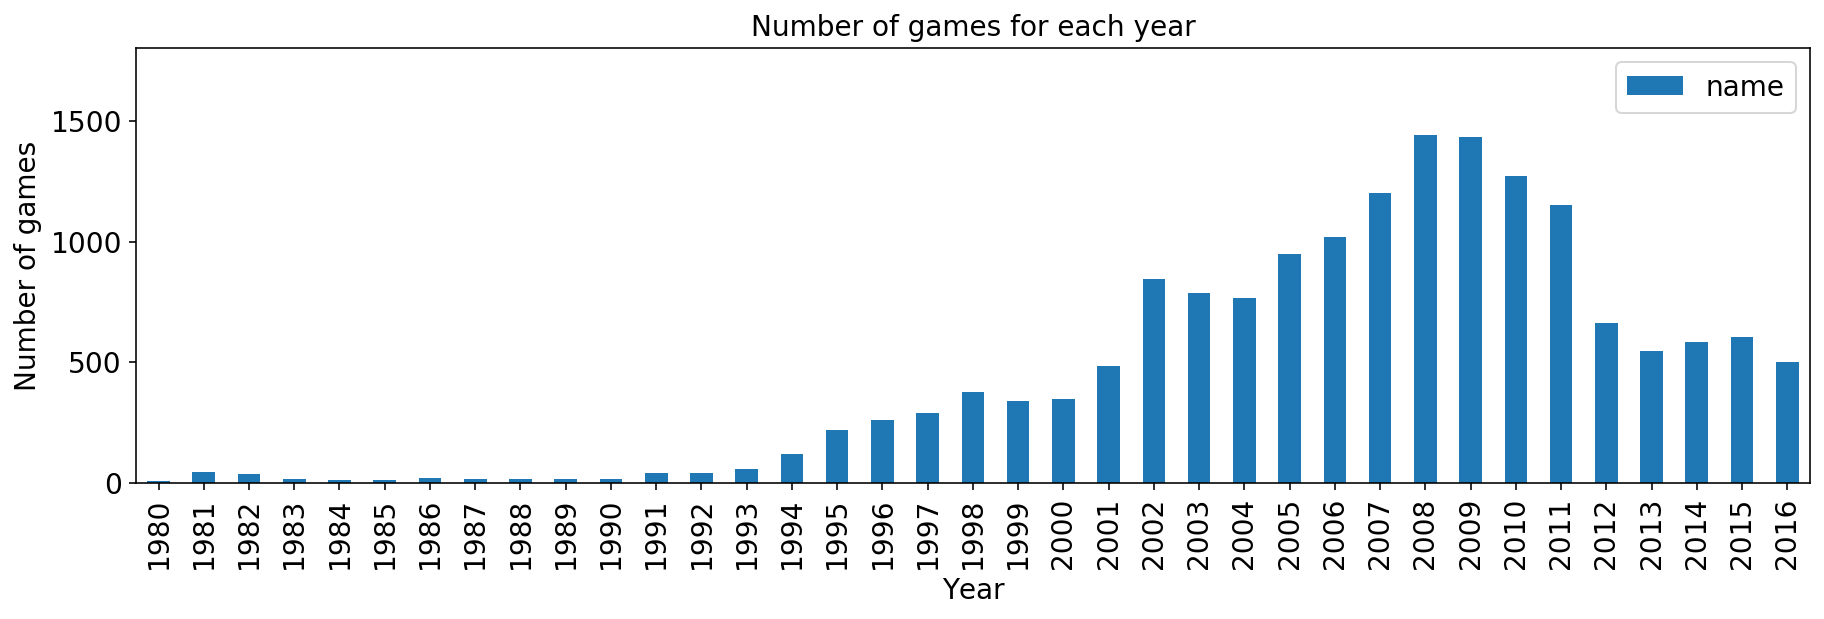

In [59]:
drawPlot(games_per_year_pivot,title='Number of games for each year', kind='bar',sizeMax=15,sizeMin=4,xlabel='Year',ylabel='Number of games',ylimMax=1800)

The graph has a positive trend until *2008*. After that there is a decline. For the last 4 years, the number of games fluctuates between 500 and 600 a year. It is difficult to determine how many games are released per month on average, but it is safe to say that the number of games has increased over time. Over 28 years (1980 *minimum* - 2008 *maximum*) the number of games increased **160** times. The decline after 2008 was due to the 2008 crisis.  We can also say that mobile games took over part of the market. 

Taking data for all periods would be an irrational decision. Let's take data starting from *2002*, because this year there was a quite tangible jump of +300 games compared to 2001. We can say that there was a boom in the gaming industry that year. https://vgsales.fandom.com/wiki/Video_game_industry

In [60]:
games_stats = games_stats.query('year_of_release >= 2002')

<a id="diffPlatformPerSales"></a>
## How sales changed by platform

Let's see how sales have changed by platform and establish the platform's relevance period. Choose the platforms with the highest total sales and plot the distribution over the years.

Let's create a function for drawing graphs

In [61]:
def drawPlotAdvanced(df,suptitle_param,x_param,y_param,hue_param,xlabel_param,ylabel_param,plotKind):
    if plotKind == "lineplot":
        sns.set(rc={'figure.figsize':(14,5)})
        plt.suptitle(suptitle_param)
        ax = sns.lineplot(x = x_param,y=y_param,data=df,hue = hue_param,palette=('Set1'),linewidth=2)
        ax.set(xlabel=xlabel_param,ylabel=ylabel_param)
        plt.show()
    elif plotKind == "boxplot":
        sns.set(rc={'figure.figsize':(14,5)})
        plt.suptitle(suptitle_param)
        ax = sns.boxplot(x = x_param,y=y_param,data=df)
        ax.set(xlabel=xlabel_param,ylabel=ylabel_param)
        plt.show()

Let's group the data by platform, calculate total sales using *pivot_table* and sort them by total sales using *sort_values()* method.

In [62]:
platform_total_sale_pivot = games_stats.pivot_table(index='platform',values='total_sales',aggfunc='sum')
platform_total_sale_pivot_sorted  = platform_total_sale_pivot.sort_values(by='total_sales',ascending=False)

Let's take the top 5 platforms with the highest total sales.

In [63]:
platform_total_sale_pivot_sorted.head()

,total_sales
platform,
PS2,1040.610
X360,966.610
PS3,935.190
Wii,903.310
DS,804.260


Let's make separate general populations for each of the top 5 platforms.

In [64]:
ps2_total_sales = games_stats.query('platform == "PS2"').loc[:,['platform','name','year_of_release','total_sales']].reset_index(drop=True)
x360_total_sales = games_stats.query('platform == "X360"').loc[:,['platform','name','year_of_release','total_sales']].reset_index(drop=True)
ps3_total_sales = games_stats.query('platform == "PS3"').loc[:,['platform','name','year_of_release','total_sales']].reset_index(drop=True)
wii_total_sales = games_stats.query('platform == "Wii"').loc[:,['platform','name','year_of_release','total_sales']].reset_index(drop=True)
ds_total_sales = games_stats.query('platform == "DS"').loc[:,['platform','name','year_of_release','total_sales']].reset_index(drop=True)

Let's combine them into a common *dataframe*.

In [65]:
top_5_platform_sales = ps2_total_sales.append(x360_total_sales,ignore_index=True)
top_5_platform_sales = top_5_platform_sales.append(ps3_total_sales,ignore_index=True)
top_5_platform_sales = top_5_platform_sales.append(wii_total_sales,ignore_index=True)
top_5_platform_sales = top_5_platform_sales.append(ds_total_sales,ignore_index=True)

Let's group the data by platform and year of release of the game, and calculate the total sales.

In [66]:
top_5_platform_sales_pivot = top_5_platform_sales.pivot_table(index=['platform','year_of_release']
                                                              ,values='total_sales'
                                                             ,aggfunc='sum').reset_index()

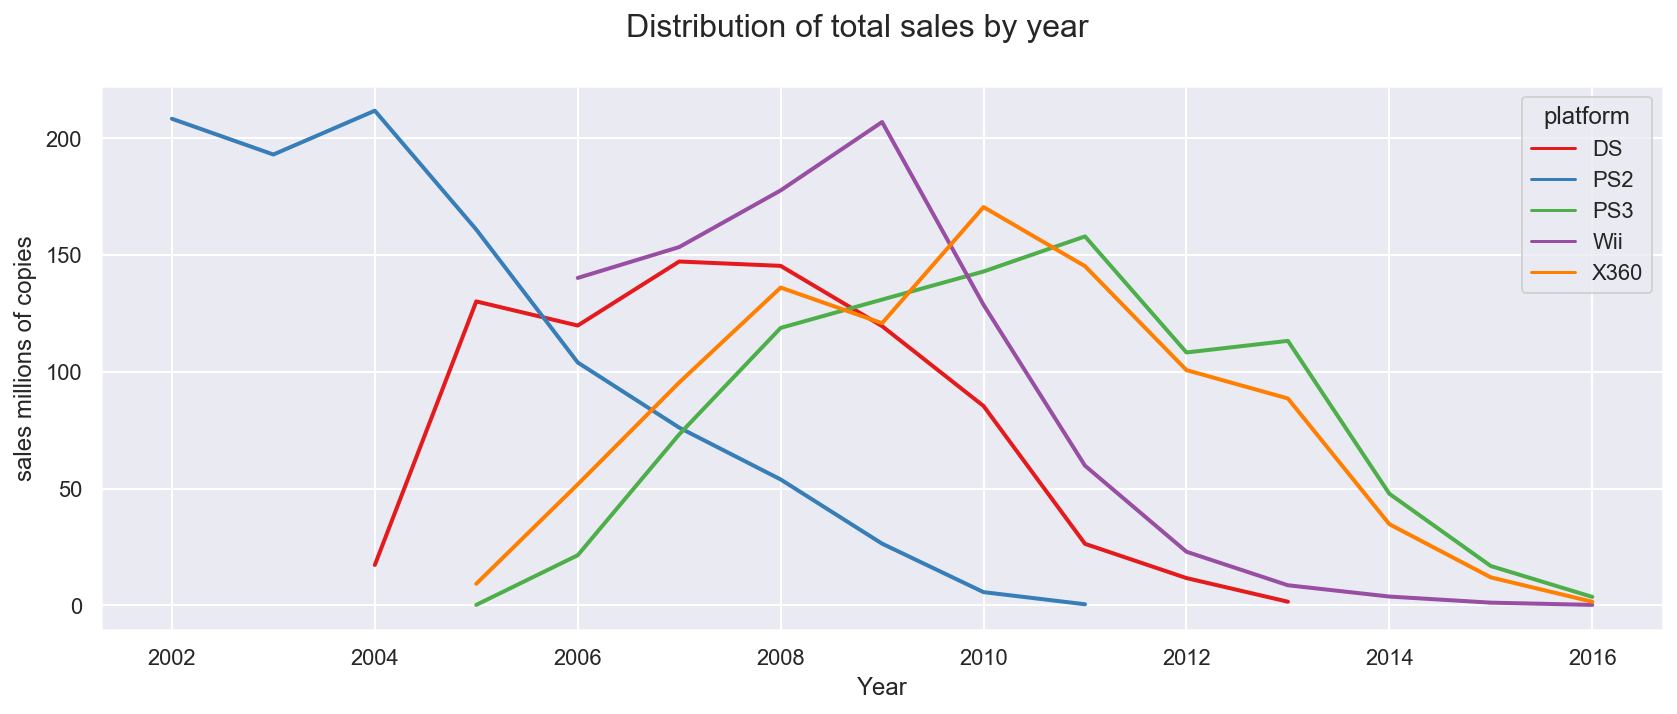

In [67]:
drawPlotAdvanced(top_5_platform_sales_pivot,"Distribution of total sales by year",'year_of_release','total_sales','platform',"Year","sales millions of copies","lineplot")

Let's break down each platform.

### DS

Sales increased sharply until ~2007 (max total sales of 150mm). After that, a decline in sales followed. Most likely, the console became unpopular after 2008.

### PS2
There was explosive growth in the period 2000-2004. The console began to conquer the market in this period. After ~2004, the sales growth went down because new players (consoles) appeared on the market. 

### PS3 и Xbox 360
Based on the graph, we can conclude that both consoles had similar sales for 10 years. Peak popularity in 2010 was *Xbox 360*. Peak popularity ~2011-12 - *PS3*. After the peaks comes a decline in sales.

### Wii
Sales started at 150 million copies in ~2006. The sales growth goes up to 2008 (peak popularity), after that there is a sharp decline. 

In order to determine the relevance period of the platform, we apply the 3-sigma rule. In particular, let's take the interval ($\mu$ + $\sigma$) ($\mu$ - $\sigma$) - most values will be in this interval, therefore, we can assume that this interval is - the period of relevance of the platform.


Let's write a function that will return the demand period of the platform.

In [68]:
def demandPeriod(df):
    return int((df['year_of_release'].mean() + df['year_of_release'].std()) - 
                     (df['year_of_release'].mean() - df['year_of_release'].std()))

In [69]:
ps2_sales = top_5_platform_sales_pivot.query('platform == "PS2"')
ps3_sales = top_5_platform_sales_pivot.query('platform == "PS3"')
wii_sales = top_5_platform_sales_pivot.query('platform == "Wii"')
x360_sales = top_5_platform_sales_pivot.query('platform == "X360"')
ds_sales = top_5_platform_sales_pivot.query('platform == "DS"')
ps2_demand_period = demandPeriod(ps2_sales)
ps3_demand_period = demandPeriod(ps3_sales)
wii_demand_period = demandPeriod(wii_sales)
x360_demand_period = demandPeriod(x360_sales)
ds_demand_period = demandPeriod(ds_sales)

Let's create a *dataframe* - platform relevance term.

In [70]:
demandPeriod_df = pd.DataFrame({'platform': ['PS2','PS3','Wii','Xbox 360','DS'], 'period': [ps2_demand_period,ps3_demand_period
                                                                                           ,wii_demand_period,x360_demand_period
                                                                                          ,ds_demand_period]})
demandPeriod_df

,platform,period
0,PS2,6
1,PS3,7
2,Wii,6
3,Xbox 360,7
4,DS,6


In [71]:
print('Average platform relevance period: ',round(demandPeriod_df['period'].mean()))

Average platform relevance period:  6.0


We have determined the platform's relevance period to be **6 years**.

<a id="demandPeriod"></a>
## Determining the actual period

Based on the conclusions of the previous questions, let's take the data for the last 6 years (the average period of platform relevance). In this way we will save important information, because we can see in this period the peak of sales, growth and decline.

Let's take the general population for the last 6 years, i.e. since 2011.

In [72]:
games_stats_2011 = games_stats.query('year_of_release >= 2011')

In [73]:
games_stats_2011.isna().sum()

name                  0
platform              0
year_of_release       0
genre                 0
na_sales              0
eu_sales              0
jp_sales              0
other_sales           0
critic_score         11
user_score            4
rating             1533
rating_num            0
total_sales           0
dtype: int64

During this period, we will be able to see a decline in the current consoles for that period and an increase in sales of new consoles.

<a id="leaderPlatform&SearchProspective"></a>
## Leading platforms, search for prospective platforms

We need to find the leading platforms for the actual period.

In [74]:
leader_platforms = games_stats_2011.pivot_table(index='platform',values='total_sales',aggfunc='sum')
leader_platforms_sorted = leader_platforms.sort_values(by='total_sales',ascending = False)
leader_platforms_sorted.head(10)

,total_sales
platform,
PS3,447.690
X360,382.750
PS4,314.140
3DS,258.210
XOne,159.320
PC,98.670
Wii,96.390
WiiU,82.190
PSV,53.810


Top 5 leading platforms: *PS3*,*Xbox 360*,*PS4*,*3DS*,*XOne*. 3 corporations lead the game industry market:
1. Sony
2. Microsoft
3. Nintendo

Let's group the data by platform and year of release of the game, and calculate the total sales.

In [75]:
leader_platforms_pivot = games_stats_2011.pivot_table(index=['platform','year_of_release']
                                                              ,values='total_sales'
                                                             ,aggfunc='sum').reset_index()

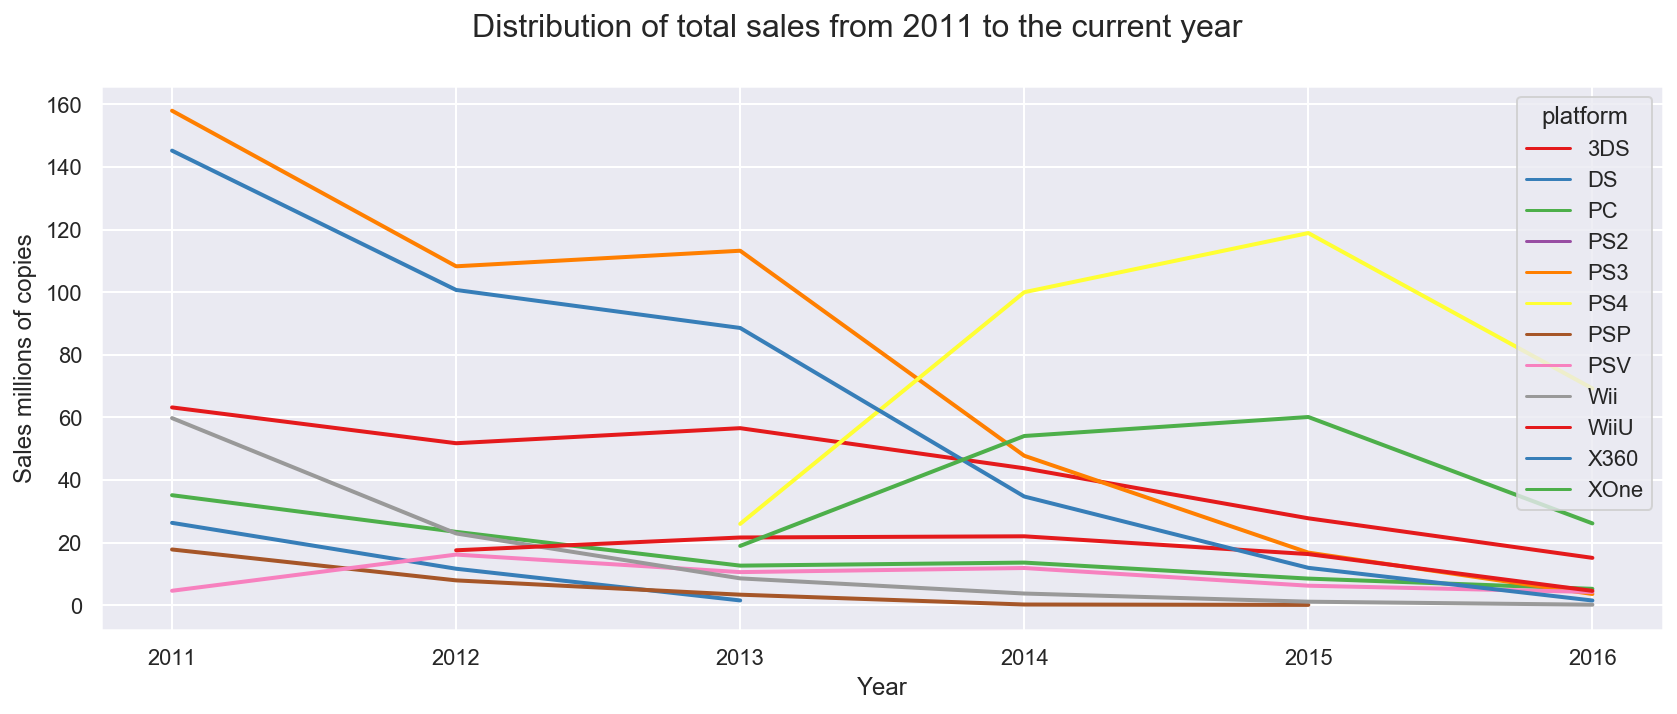

In [76]:
drawPlotAdvanced(leader_platforms_pivot,"Distribution of total sales from 2011 to the current year",'year_of_release','total_sales','platform',"Year","Sales millions of copies","lineplot")

Based on the graph, we can conclude:
1. The consoles of the last generation are becoming irrelevant. If you look at the graph of *PS3* and *Xbox 360*, *Wii*, sales are falling every year.
2. New generation consoles are showing actuality: *PS4*, *Xbox One*,*WiiU*.

Let's take a closer look at consoles of the last generation and the new generation.

### Consoles of the last generation

In [77]:
ps3_sales_2011 = games_stats_2011.query('platform == "PS3"')
xbox360_sales_2011 = games_stats_2011.query('platform == "X360"')
wii_sales_2011 = games_stats_2011.query('platform == "Wii"')

Let's group the data by year of release of the game, and calculate the total sales.

In [78]:
ps3_sales_2011_pivot = ps3_sales_2011.pivot_table(index='year_of_release',values='total_sales',aggfunc='sum')
xbox360_sales_2011_pivot = xbox360_sales_2011.pivot_table(index='year_of_release',values='total_sales',aggfunc='sum')
wii_sales_2011_pivot = wii_sales_2011.pivot_table(index='year_of_release',values='total_sales',aggfunc='sum')

Let's use the *drawplot()* function to build graphs for each platform.

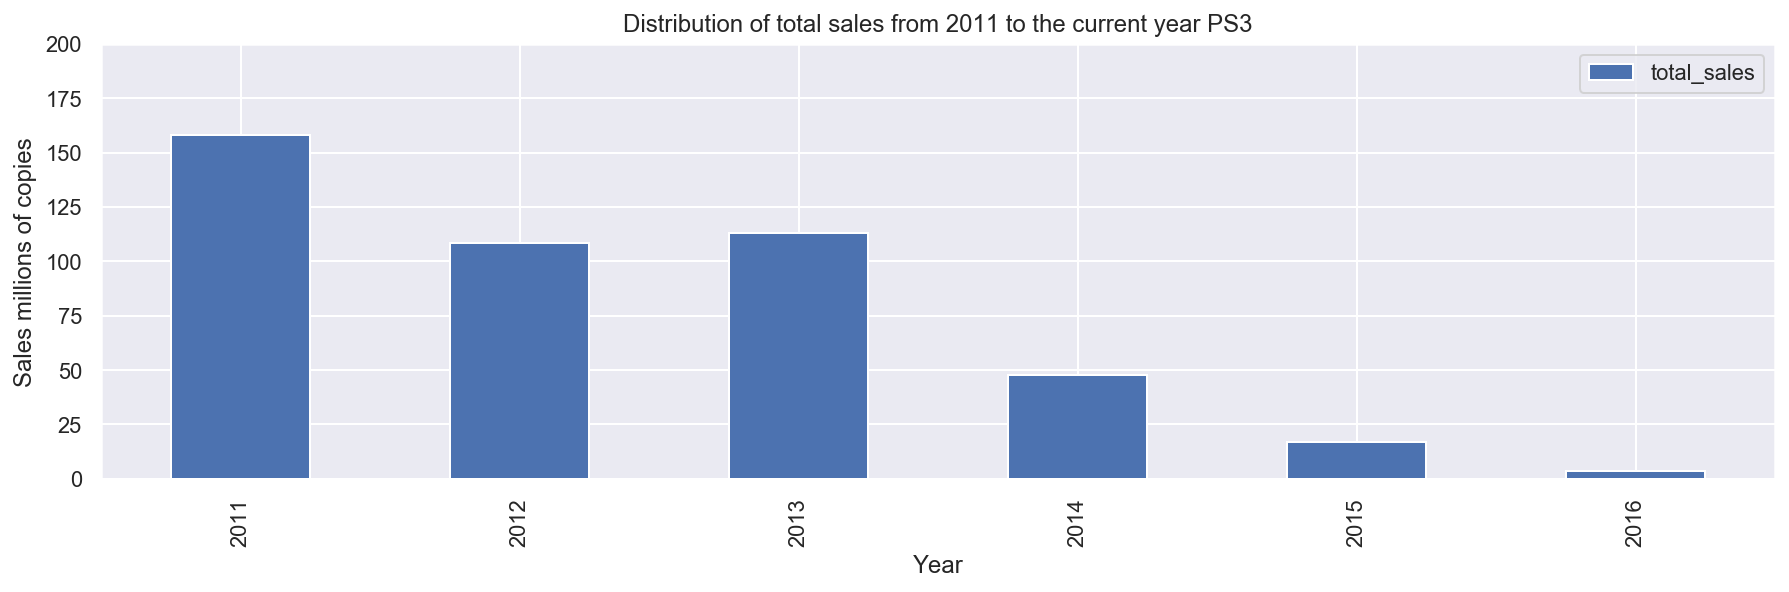

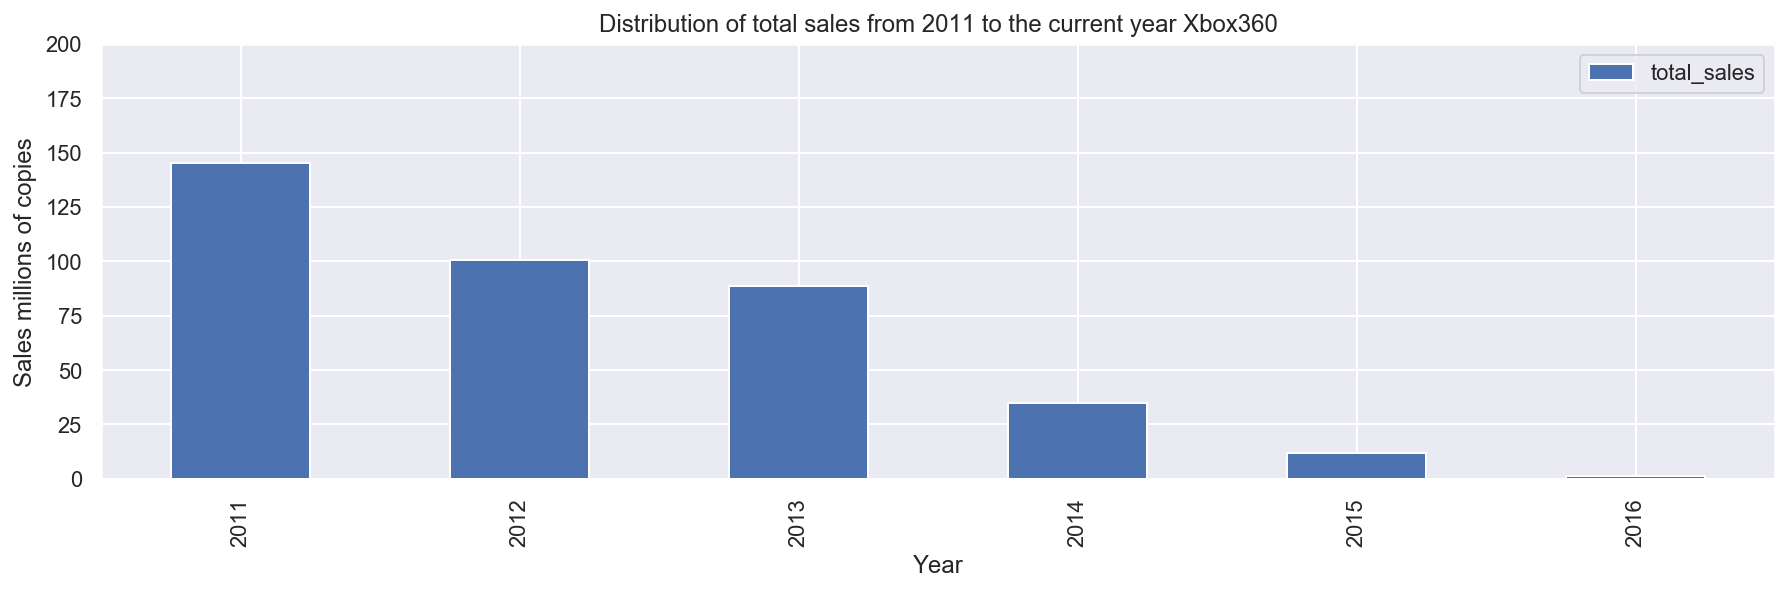

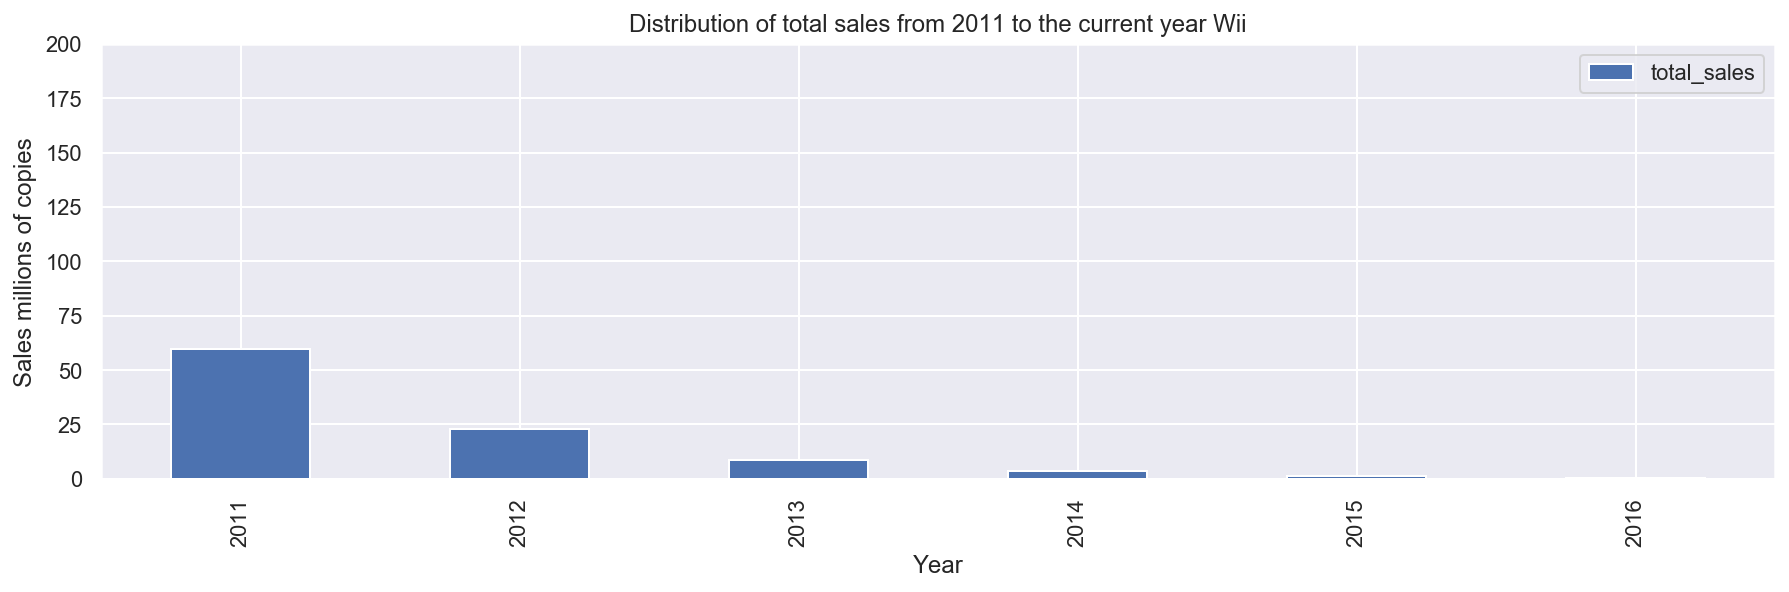

In [79]:
old_platforms = {
    'PS3': ps3_sales_2011_pivot,
    'Xbox360': xbox360_sales_2011_pivot,
    'Wii': wii_sales_2011_pivot
}

for platform in old_platforms.keys():
    drawPlot(old_platforms[platform],title=f'Distribution of total sales from 2011 to the current year {platform}', kind='bar'
             ,sizeMax=15,sizeMin=4,xlabel='Year',ylabel='Sales millions of copies',ylimMax=200)

As we can see, sales are falling every year, so the popularity is also falling. Let's look at the consoles of the new generation.

### Consoles of the new generation

In [80]:
ps4_sales_2011 = games_stats_2011.query('platform == "PS4"')
xboxOne_sales_2011 = games_stats_2011.query('platform == "XOne"')
wiiU_sales_2011 = games_stats_2011.query('platform == "WiiU"')

Let's group the data by year of release of the game, and calculate the total sales.

In [81]:
ps4_sales_2011_pivot = ps4_sales_2011.pivot_table(index='year_of_release',values='total_sales',aggfunc='sum')
xboxOne_sales_2011_pivot = xboxOne_sales_2011.pivot_table(index='year_of_release',values='total_sales',aggfunc='sum')
wiiU_sales_2011_pivot = wiiU_sales_2011.pivot_table(index='year_of_release',values='total_sales',aggfunc='sum')

Let's use the *drawplot()* function to build graphs for each platform.

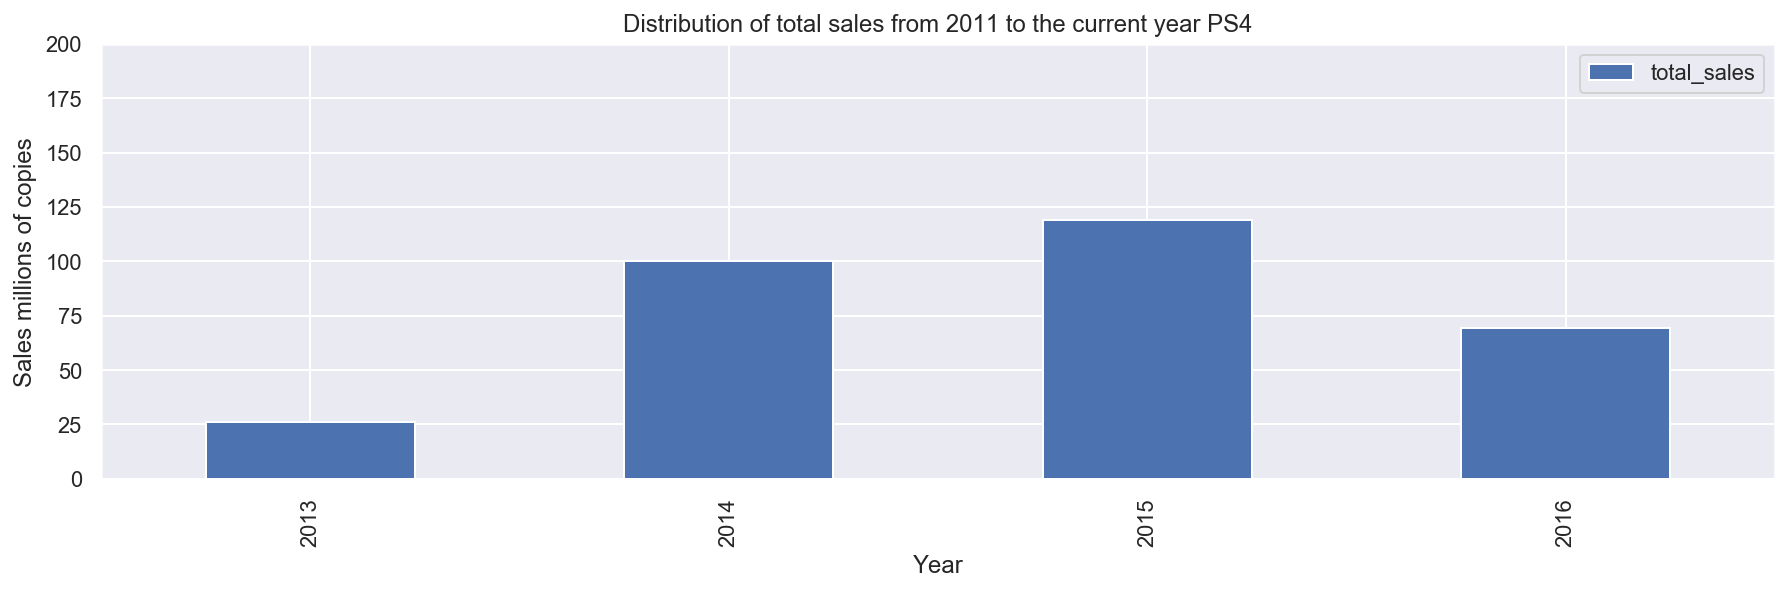

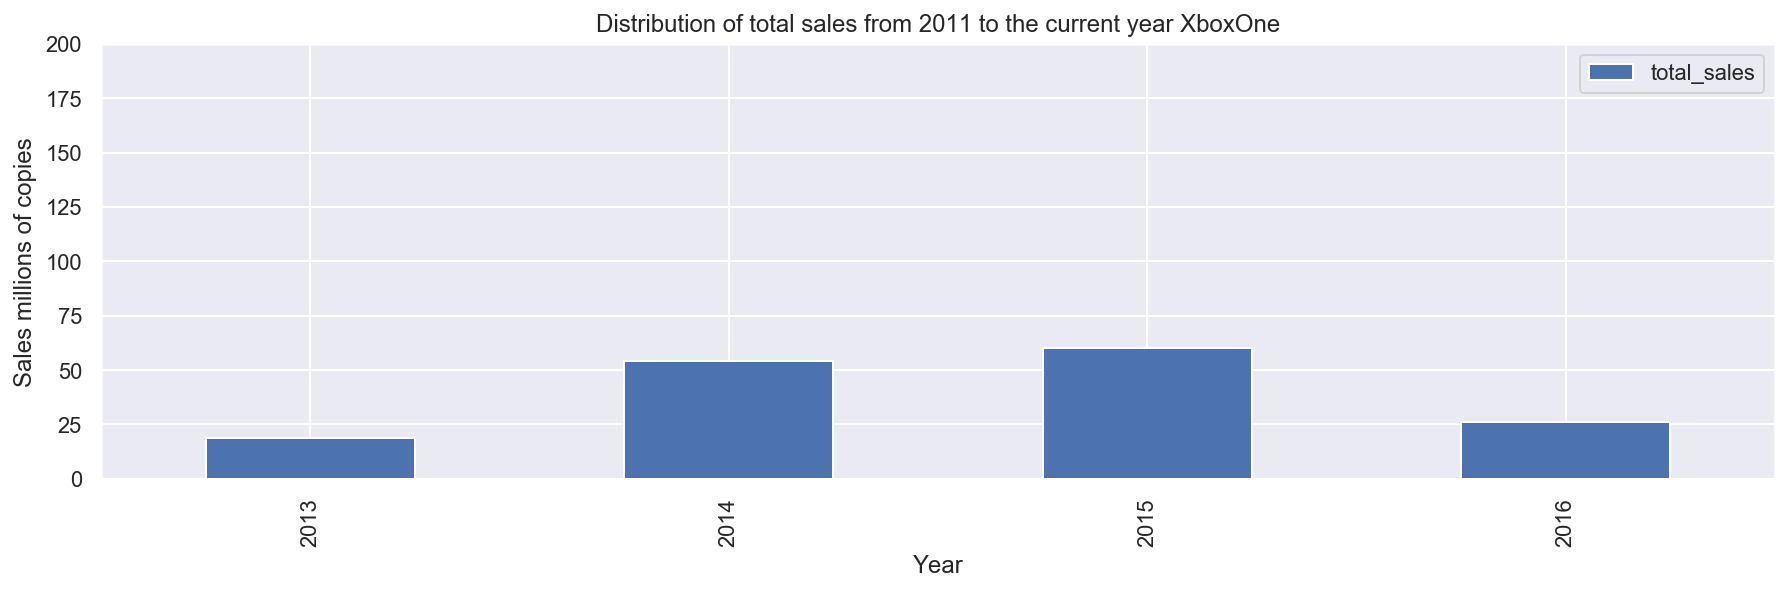

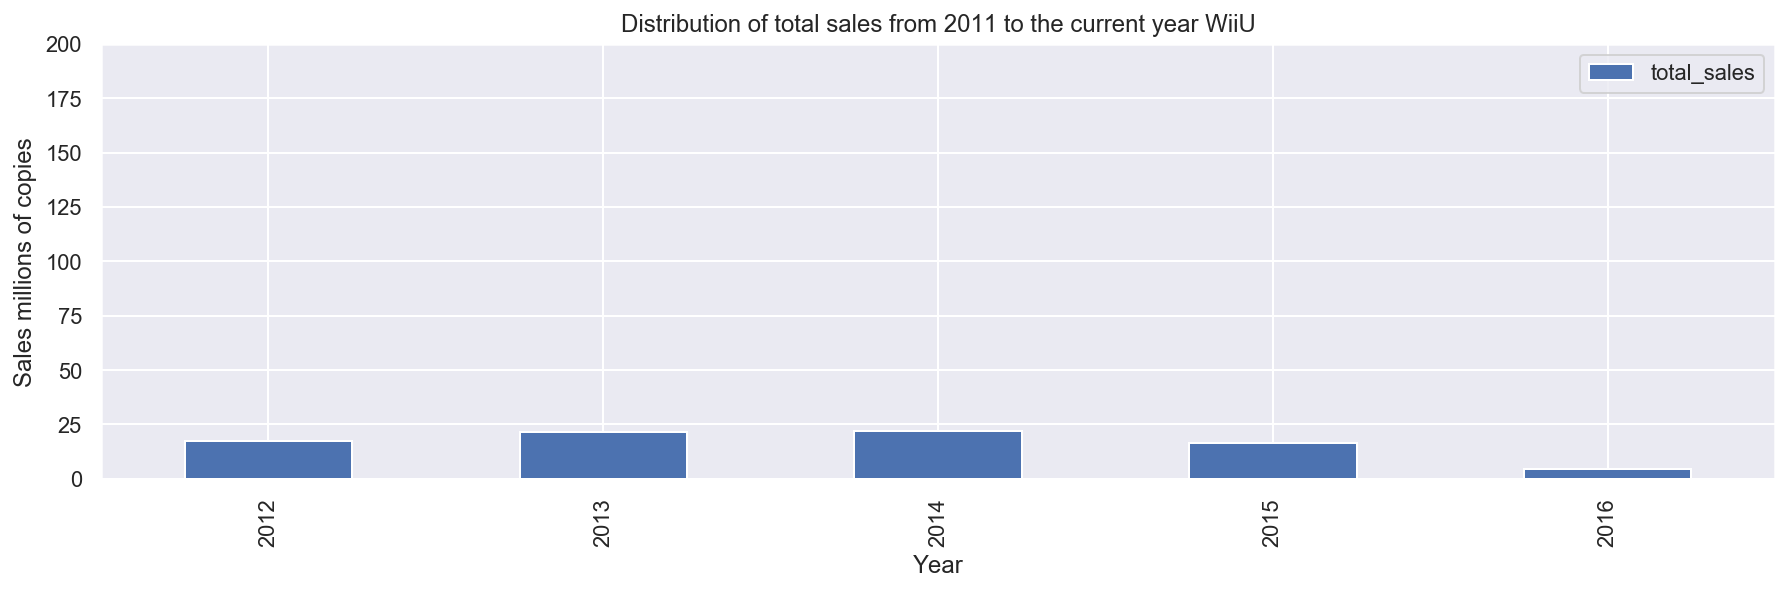

In [82]:
new_platforms = {
    'PS4': ps4_sales_2011_pivot,
    'XboxOne': xboxOne_sales_2011_pivot,
    'WiiU': wiiU_sales_2011_pivot 
}

for platform in new_platforms.keys():
    drawPlot(new_platforms[platform],title=f'Distribution of total sales from 2011 to the current year {platform}', kind='bar'
             ,sizeMax=15,sizeMin=4,xlabel='Year',ylabel='Sales millions of copies',ylimMax=200)

The situation with next-generation consoles is different. Sales have shown growth and a slight decline. New generation consoles can be considered promising platforms. It did not take long for the relevance period. Perhaps these consoles will show profit next year, maybe new games will come out and thus sales for these consoles will increase.

<a id="distGlobalSalesPerPlatform"></a>
## Distribution of global sales by platform

Let's look at the distribution of global sales by platform.

In [83]:
platform_global_sales = games_stats_2011.pivot_table(index=['platform','year_of_release'],values='total_sales',aggfunc='sum').reset_index()

Let's draw a scatter plot.

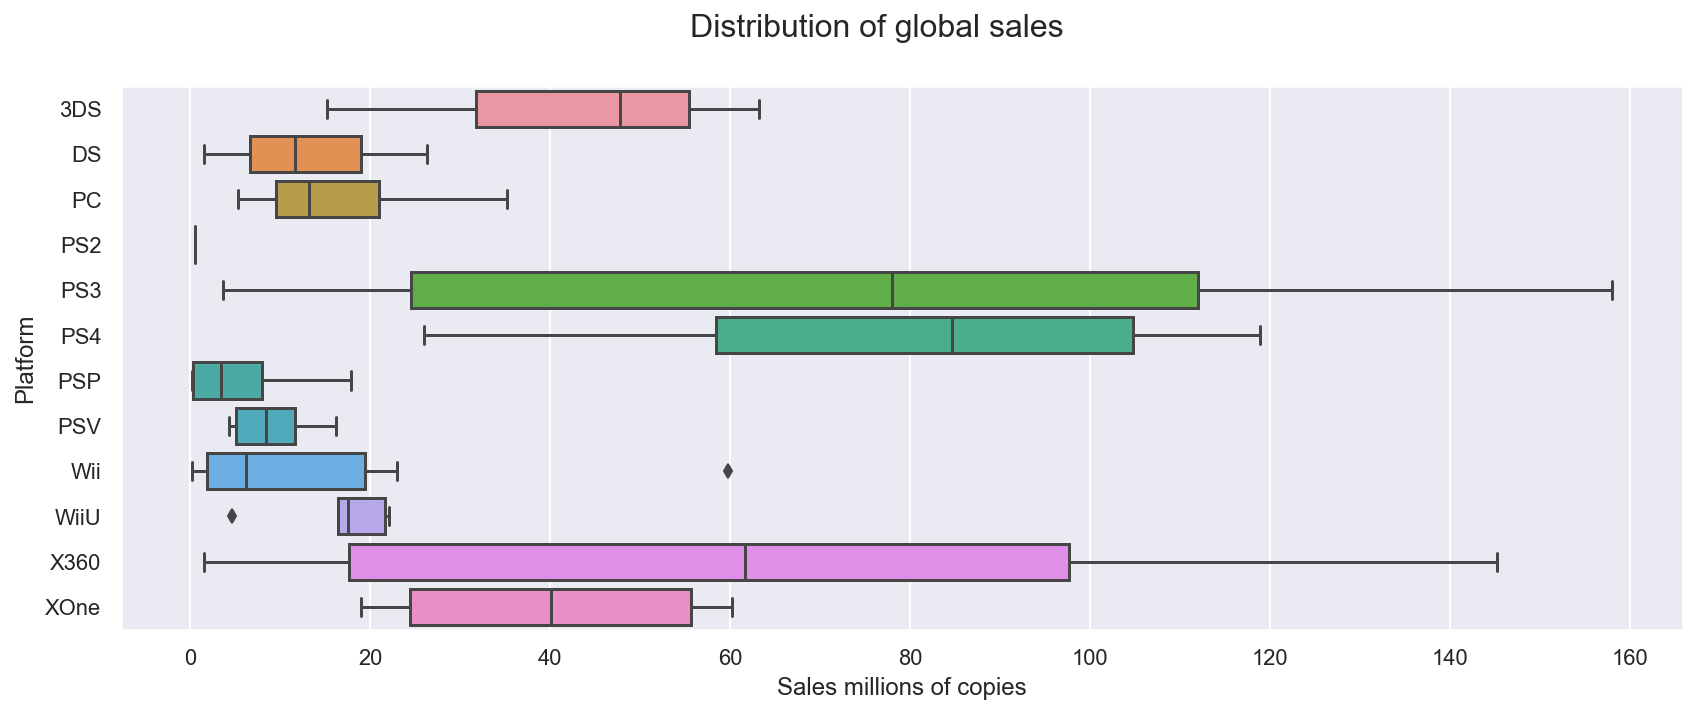

In [84]:
drawPlotAdvanced(platform_global_sales, "Distribution of global sales",'total_sales','platform',None,"Sales millions of copies","Platform","boxplot")

Leaders in global sales: *Xbox 360*,*PS3*. Most values are in the range from 25 million to 115 million copies. On average Xbox 360 - 60 million copies, PS3 - 80 million copies. New generation consoles are not far behind in sales. *3DS* - Global sales are similar to those of *Xbox One*. Less popular platforms: *PSP*,*PSV*,*WiiU* - "portable consoles"

Let's look at the distribution of global sales by promising platform. We will build a scatter plot.

In [85]:
perspective_platforms = ps4_sales_2011.append(xboxOne_sales_2011,ignore_index=True)
perspective_platforms = perspective_platforms.append(wiiU_sales_2011,ignore_index=True)
perspective_platforms_global_sales = perspective_platforms.pivot_table(index=['platform','year_of_release']
                                                              ,values='total_sales'
                                                             ,aggfunc='sum').reset_index()

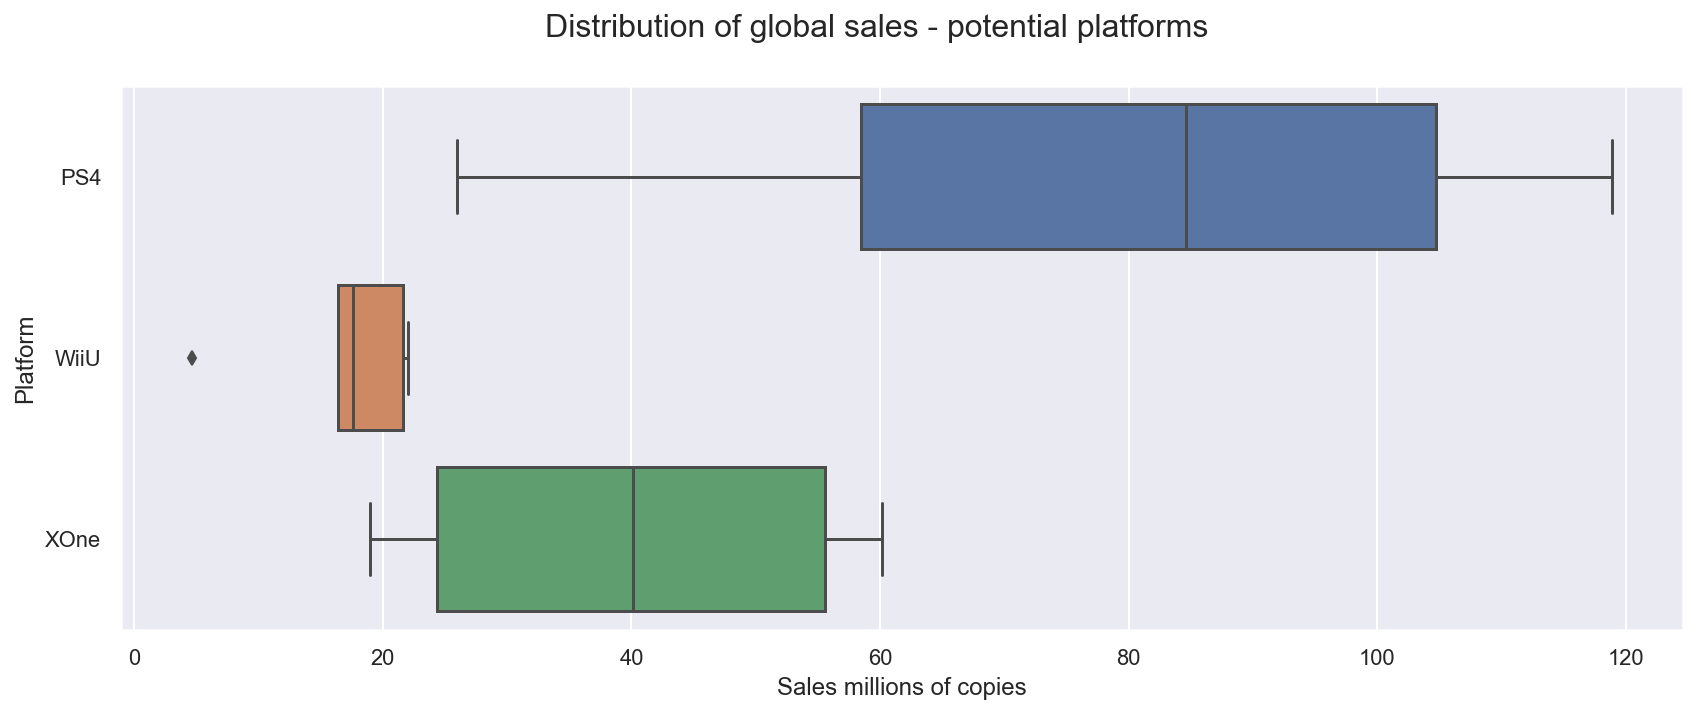

In [86]:
drawPlotAdvanced(perspective_platforms_global_sales, "Distribution of global sales - potential platforms",'total_sales','platform',None,"Sales millions of copies","Platform","boxplot")

1. PS4 - most sales are in the 60 million to 105 million copies range. The average is about 84 million copies. PS4 is the most profitable platform compared to other platforms.
2. WiiU - The total number of sales does not reach 25 million copies. Hence, we can consider it less profitable. Maybe some games from famous studios will improve the situation.
3. Xbox One - Most sales are in the range of 23 million to 57 million copies. On average about 40 million copies are sold each year on this platform. 

WiiU is a less profitable platform because handheld platforms(consoles) are less popular in general. As for the other platforms, PS4 has proven to be the most popular platform because of the large number of exclusive games. Sony has its own set of exclusive games that are not available on Xbox One: Uncharted 4, Gran Turismo Sport, God of War, Death Stranding, Persona 5, Street Fighter V, The Last Guardian and many others. Meanwhile, the Xbox One boasts access to a library of games from the last generation that no other console in the world has.

Next year's focus could be on the new *Xbox One* and *PS4* consoles. Also don't forget about the WiiU, even though this platform has low sales so far, but maybe something will happen and the situation will improve (though it's unlikely). 

<a id="userCritcScoreImpact"></a>
## The impact of user and critic feedback on sales

We need to understand whether user and critic reviews have an impact on sales.

Let's take the most promising platform, in this case we take PS4. Consider the correlation between reviews (users and critics) and sales.

Let's write a function that will draw scatter plots.

In [87]:
def drawCorrDiagram(df,x_param,y_param,kind_param,alpha_param,legend_param,title_param):
    df.plot(x=x_param,y=y_param,kind=kind_param,alpha=alpha_param,legend=legend_param,title=title_param)
    plt.show()

Let's look at the correlation between user ratings and sales.

Filter the data. Let's take the sample without missing values, exclude those rows where the rating was not determined.

In [88]:
ps4_sales_2011_non_nan_user_score = non_nan_column(ps4_sales_2011,'user_score').reset_index(drop=True).query('user_score > 0')
ps4_sales_2011_non_nan_critic_score = non_nan_column(ps4_sales_2011,'critic_score').reset_index(drop=True).query('critic_score > 0')

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


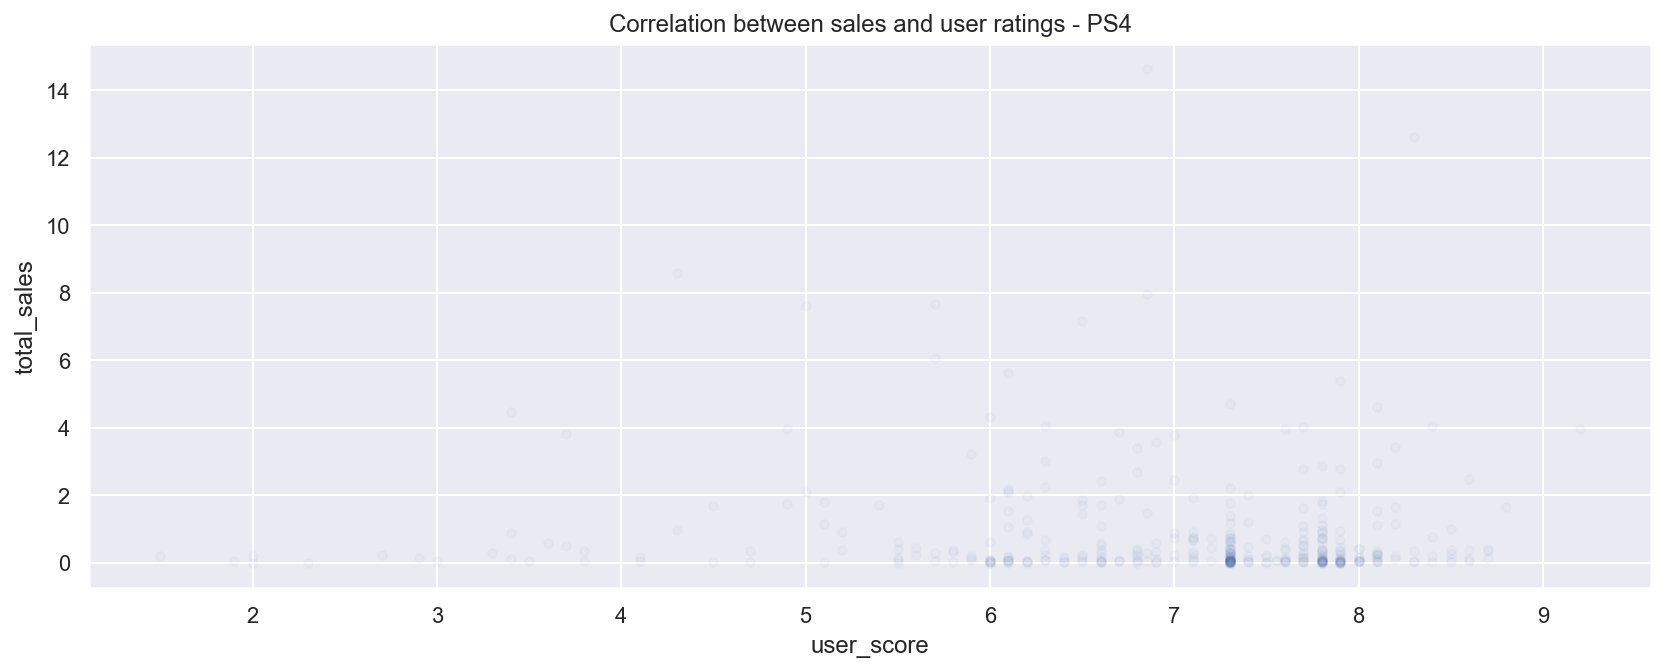

In [89]:
drawCorrDiagram(df=ps4_sales_2011_non_nan_user_score,x_param='user_score',y_param='total_sales',kind_param='scatter'
                ,alpha_param=0.03,legend_param=True,title_param='Correlation between sales and user ratings - PS4')

From the graph, we can conclude that user ratings and sales are not correlated. Let's look at the Pearson coefficient.

In [90]:
print(ps4_sales_2011_non_nan_user_score['total_sales'].corr(ps4_sales_2011_non_nan_user_score['user_score']))

-0.07278107378195338


The Pearson coefficient is close to zero, which means that the connection is weak or absent at all. 

Let's look at the correlation between critics' evaluations and sales.

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


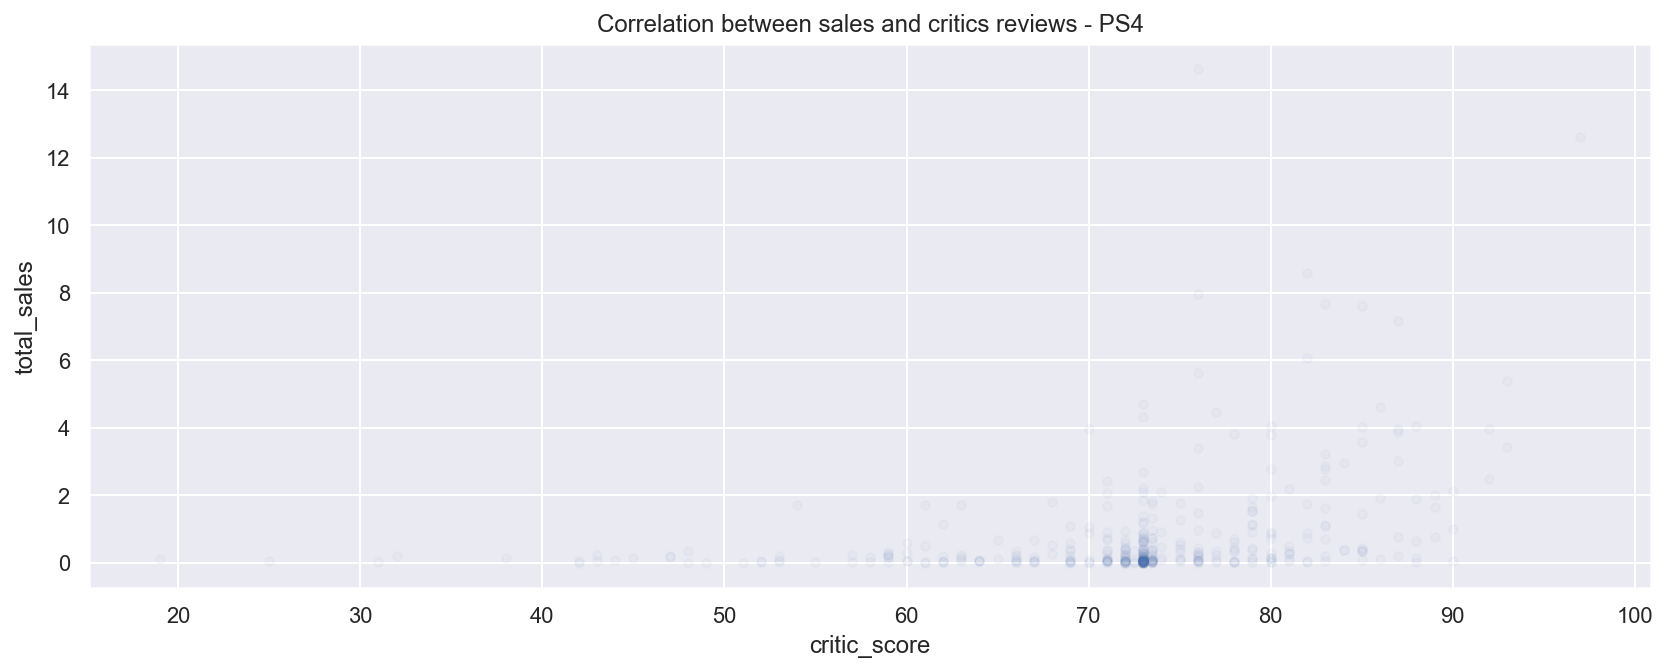

In [91]:
drawCorrDiagram(df=ps4_sales_2011_non_nan_critic_score,x_param='critic_score',y_param='total_sales',kind_param='scatter'
                ,alpha_param=0.03,legend_param=True,title_param='Correlation between sales and critics reviews - PS4')

The graph shows that critics' scores and sales are less correlated with each other. Let's look at the Pearson coefficient.

In [92]:
print(ps4_sales_2011_non_nan_critic_score['total_sales'].corr(ps4_sales_2011_non_nan_critic_score['critic_score']))

0.33476893281096876


The Pearson coefficient is 0.33 - there is a connection, but it is weak. Consequently, critics' scores do not always affect the game's sales.

What about other consoles? Is this situation only with the PS4? Let's look at the correlation in other potential consoles. Take the Xbox One.

Filter the data. Let's take the sample without missing values, exclude those rows where the rating was not determined.

In [93]:
xboxOne_sales_2011_non_nan_user_score = non_nan_column(xboxOne_sales_2011,'user_score').reset_index(drop=True).query('user_score > 0')
xboxOne_sales_2011_non_nan_critic_score = non_nan_column(xboxOne_sales_2011,'critic_score').reset_index(drop=True).query('critic_score > 0')

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


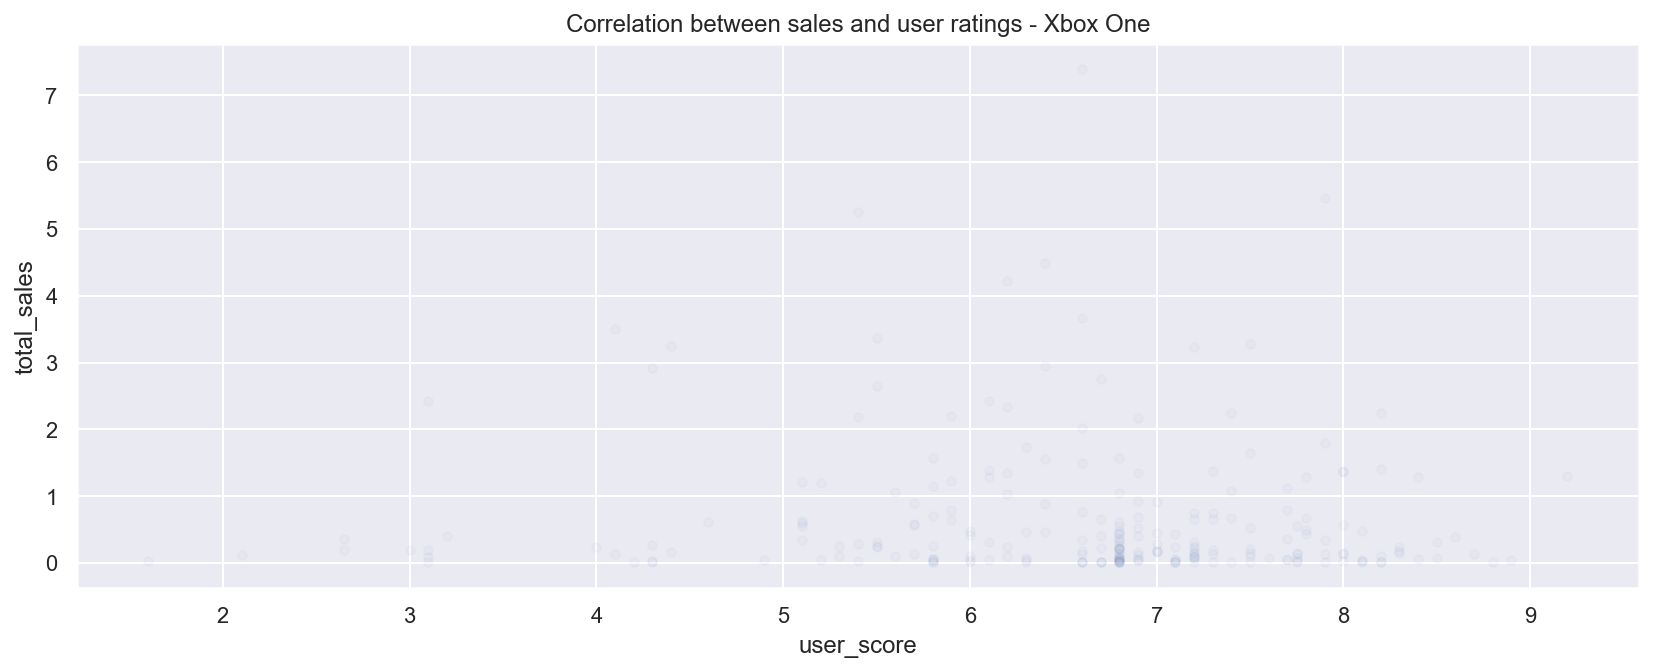

In [94]:
drawCorrDiagram(df=xboxOne_sales_2011_non_nan_user_score,x_param='user_score',y_param='total_sales',kind_param='scatter'
                ,alpha_param=0.03,legend_param=True,title_param='Correlation between sales and user ratings - Xbox One')

We see almost the same situation with the PS4. Let's look at the Pearson coefficient.

In [95]:
print(xboxOne_sales_2011_non_nan_user_score['total_sales'].corr(xboxOne_sales_2011_non_nan_user_score['user_score']))

-0.06876720540266656


The Pearson coefficient is close to 0, the relationship is very weak or there is no relationship at all.

Let's look at the correlation between critics' evaluations and sales.

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


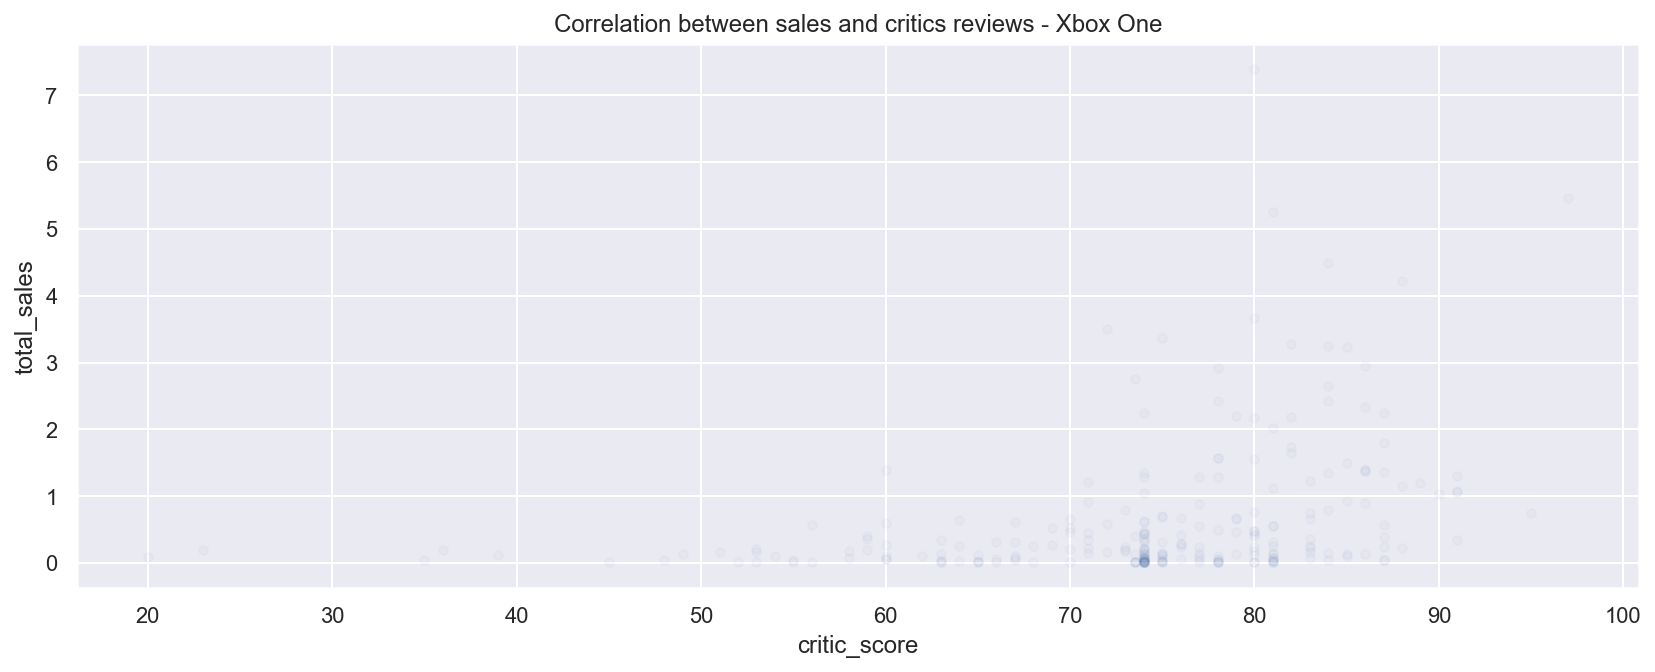

In [96]:
drawCorrDiagram(df=xboxOne_sales_2011_non_nan_critic_score,x_param='critic_score',y_param='total_sales',kind_param='scatter'
                ,alpha_param=0.03,legend_param=True,title_param='Correlation between sales and critics reviews - Xbox One')

Same thing. We see a weak correlation. Consider the Pearson coefficient.

In [97]:
print(xboxOne_sales_2011_non_nan_critic_score['critic_score'].corr(xboxOne_sales_2011_non_nan_critic_score['total_sales']))

0.33155145507232087


The Pearson coefficient is 0.33 - there is a connection, but it is weak. Consequently, critics' scores do not always affect the sales of the game for the *Xbox* platform.

In general, user ratings do not affect the total sales of games for prospective consoles.Meanwhile, the ratings of critics have an impact, but not always.

<a id="gameDistPerGenre"></a>
## Distribution of games by genre

We need to look at the overall distribution of games by genre. Let's find the profitable genres. Which genres have high profitability and which have low profitability? 

Let's group the data by genre, and calculate total sales.

In [98]:
games_genre_dist = games_stats_2011.pivot_table(index='genre',values='total_sales',aggfunc='sum')
games_genre_dist

,total_sales
genre,
Action,565.220
Adventure,45.040
Fighting,66.900
Misc,139.910
Platform,88.680
Puzzle,9.850
Racing,88.310
Role-Playing,245.630
Shooter,402.960


Let's sort, find profitable genres.

In [99]:
games_genre_dist_sorted = games_genre_dist.sort_values(by='total_sales',ascending=False)
games_genre_dist_sorted

,total_sales
genre,
Action,565.220
Shooter,402.960
Role-Playing,245.630
Sports,237.400
Misc,139.910
Platform,88.680
Racing,88.310
Fighting,66.900
Simulation,50.260


Let's draw a graph for clarity.

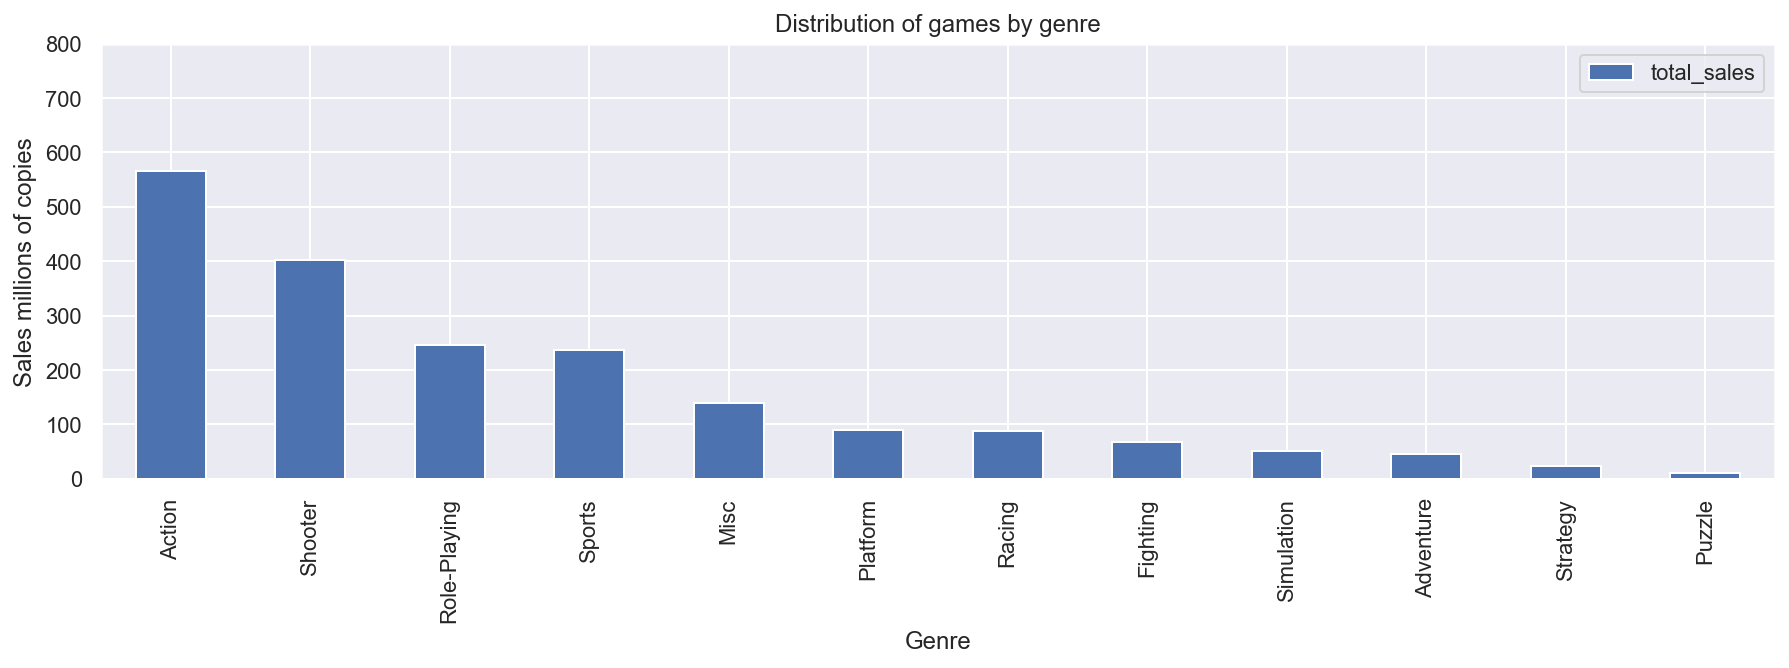

In [100]:
drawPlot(games_genre_dist_sorted,title='Distribution of games by genre', kind='bar'
             ,sizeMax=15,sizeMin=4,xlabel='Genre',ylabel='Sales millions of copies',ylimMax=800)

The genres at the top of the distribution are *Action*, *Shooter* and *Sports* - easy genres to understand. For example, *Action* - simple gameplay, a few buttons - (movement, shooting, and additional actions). In the *Action* genre, the plot is not as complex as in the *Role-Playing* genre. In the *Shooter* genre, too, the gameplay and controls are simple. *Sports* - a lot of sports fans who want to play for their favorite teams (such as Fifa) and this genre is easy to learn. The most successful series of games in the *Action* and *Shooter* genres are AAA projects: *Grand Theft Auto and Call of Duty*.

Less profitable genres: *Adventure*,*Strategy*,*Puzzle*. *Strategy* - because of its specific genre, the entry threshold is higher than in other genres. *Puzzle* - There are practically no big projects in this genre. *Adventure* - Most likely meant as a quest. There are very few if any major releases in the genre.



## Summary

During the exploratory data analysis:
1. We calculated how many games were released in different years. For the last 4 years, the number of games fluctuates between 500 and 600 a year. It is difficult to determine how many games are released per month on average, but it is safe to say that the number of games has increased over time. Over 28 years (1980 *minimum* - 2008 *maximum*) the number of games increased **160** times. The decline after 2008 was due to the 2008 crisis.  We can also say that mobile games took over part of the market. 
2. Determined a rational period for the sample. Let's take data starting from *2002*, because this year there was a quite tangible jump of +300 games compared to 2001. We can say that there was a boom in the gaming industry that year. 
3. We looked at how sales changed by platform. 
    - **DS** - Sales increased sharply until ~2007 (max total sales of 150mm). After that, a decline in sales followed. Most likely, the console became unpopular after 2008.
    - **PS2** - There was explosive growth in the period 2000-2004. The console began to conquer the market in this period. After ~2004, the sales growth went down because new players (consoles) appeared on the market. 
    - **PS3 и Xbox 360** - Based on the graph, we can conclude that both consoles had similar sales for 10 years. Peak popularity in 2010 was Xbox 360. Peak popularity ~2011-12 - PS3. After the peaks comes a decline in sales.
    - **Wii** - Sales started at 150 million copies in ~2006. The sales growth goes up to 2008 (peak popularity), after that there is a sharp decline.
  
4. We have determined the platform's relevance period to be **6 years**. In this way we will save important information, because we can see in this period the peak of sales, growth and decline.
5. We have determined leading platforms. Top 5 leading platforms: *PS3*,*Xbox 360*,*PS4*,*3DS*,*XOne*. 3 corporations lead the game industry market:
    - Sony
    - Microsoft
    - Nintendo
6. We have plotted the distribution of sales and revealed:
    - The consoles of the last generation are becoming irrelevant. If you look at the graph of *PS3* and *Xbox 360*, *Wii*, sales growth is falling every year.
    - New generation consoles are showing relevance: *PS4*, *Xbox One*,*WiiU*. They can be considered promising platforms. It hasn't been that long for the relevance term. Maybe these consoles will show profit next year, maybe new games will come out and thereby sales for these consoles will increase.
7. We looked at the distribution of sales by platform. Leaders in global sales: *Xbox 360*,*PS3*. Most values are in the range from 25 million to 115 million copies. On average Xbox 360 - 60 million copies, PS3 - 80 million copies. New generation consoles are not far behind in sales. *3DS* - Global sales are similar to those of *Xbox One*. Less popular platforms: *PSP*,*PSV*,*WiiU* - "portable consoles". PS4 - most sales are in the 60 million to 105 million copies range. The average is about 84 million copies. PS4 is the most profitable platform compared to other platforms. WiiU - The total number of sales does not reach 25 million copies. Hence, we can consider it less profitable. Maybe some games from famous studios will improve the situation. Xbox One - Most sales are in the range of 23 million to 57 million copies. On average about 40 million copies are sold each year on this platform. WiiU is a less profitable platform because handheld platforms(consoles) are less popular in general. As for the other platforms, PS4 has proven to be the most popular platform because of the large number of exclusive games. Sony has its own set of exclusive games that are not available on Xbox One: Uncharted 4, Gran Turismo Sport, God of War, Death Stranding, Persona 5, Street Fighter V, The Last Guardian and many others. Meanwhile, the Xbox One boasts access to a library of games from the last generation that no other console in the world has.
8. We looked at the correlation of user and critic reviews on game sales. In general, user ratings do not affect the total sales of games for prospective consoles.Meanwhile, the ratings of critics have an impact, but not always.
9. We also considered the distribution of games by genre. Leading genres: *Action*, *Shooter* and *Sports* - easy genres to understand. For example, *Action* - simple gameplay, a few buttons - (movement, shooting, and additional actions). In the *Action* genre, the plot is not as complex as in the *Role-Playing* genre. In the *Shooter* genre, too, the gameplay and controls are simple. *Sports* - a lot of sports fans who want to play for their favorite teams (such as Fifa) and this genre is easy to learn.  The most successful series of games in the *Action* and *Shooter* genres are AAA projects: *Grand Theft Auto and Call of Duty*. Less profitable genres: *Adventure*,*Strategy*,*Puzzle*. *Strategy* - because of its specific genre, the entry threshold is higher than in other genres. *Puzzle* - There are practically no big projects in this genre. *Adventure* - Most likely meant as a quest. There are very few if any major releases in the genre.


Let's move on to Statisitcal Analysis

<br>

---

<a id="sda"></a>
# Stage 4 - Statistical Data Analysis

At this point, we need to draw a portrait of the user of each region.

<a id="userPortrait"></a>
## User portrait

We need to divide the users of each region: *NA*,*EU*,*JP* and identify the top 5 popular platforms and the top 5 popular genres. Determine if the ESRB rating affects sales in a particular region. 

Divide users by region: *NA*,*EU*,*JP*.

In [101]:
na_users = games_stats_2011.loc[:,['name','platform','year_of_release','genre','na_sales','critic_score','user_score','rating','rating_num']].query('na_sales > 0').reset_index(drop=True)
eu_users = games_stats_2011.loc[:,['name','platform','year_of_release','genre','eu_sales','critic_score','user_score','rating','rating_num']].query('eu_sales > 0').reset_index(drop=True)
jp_users = games_stats_2011.loc[:,['name','platform','year_of_release','genre','jp_sales','critic_score','user_score','rating','rating_num']].query('jp_sales > 0').reset_index(drop=True)

<a id="top5_platforms_regions"></a>
### Top 5 popular platforms by region

Let's group the data by platform and sum up the sales.

In [102]:
na_users_platform = na_users.pivot_table(index='platform', values='na_sales',aggfunc='sum').sort_values(by='na_sales',ascending=False)
eu_users_platform = eu_users.pivot_table(index='platform', values='eu_sales',aggfunc='sum').sort_values(by='eu_sales',ascending=False)
jp_users_platform = jp_users.pivot_table(index='platform', values='jp_sales',aggfunc='sum').sort_values(by='jp_sales',ascending=False)
top_platforms_region = {
    "North America": na_users_platform,
    "Europe": eu_users_platform,
    "Japan": jp_users_platform
}

Let's draw the graphs

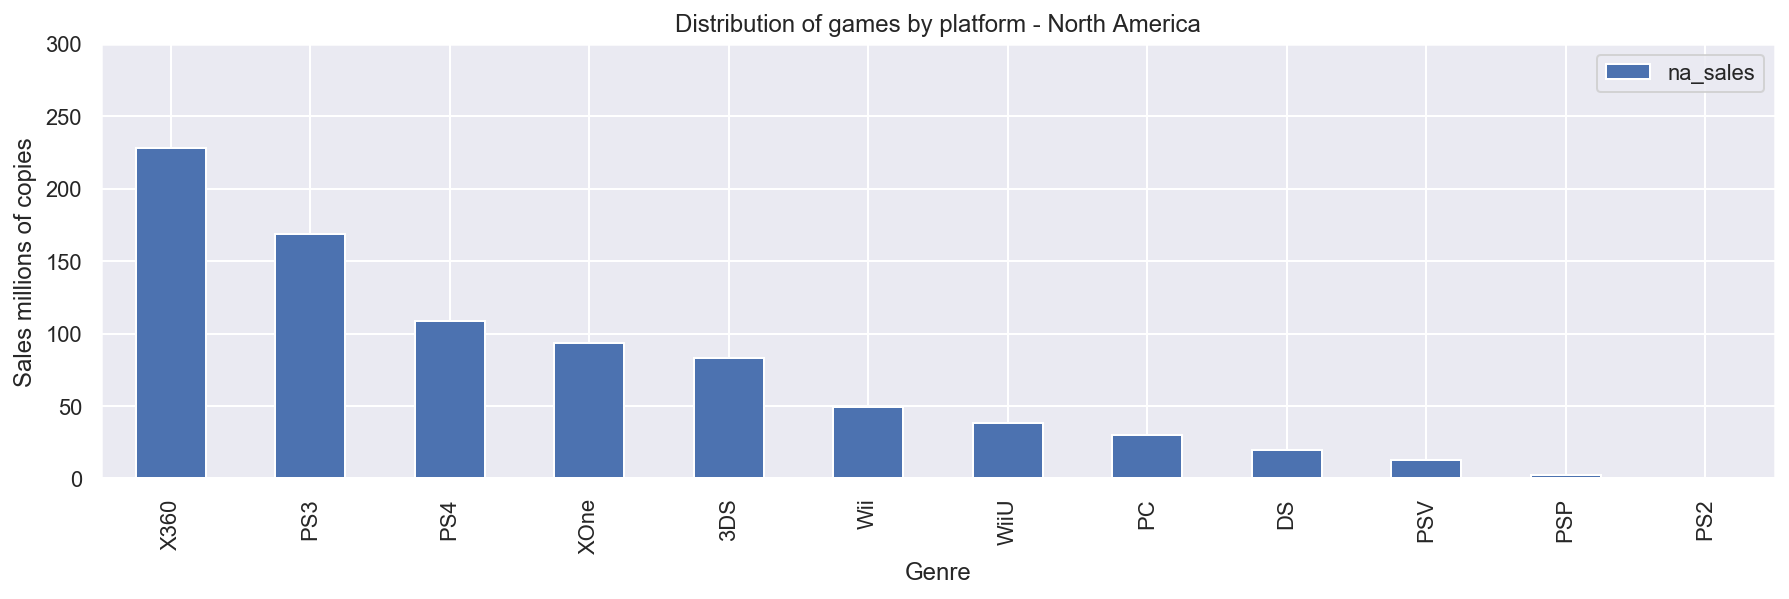

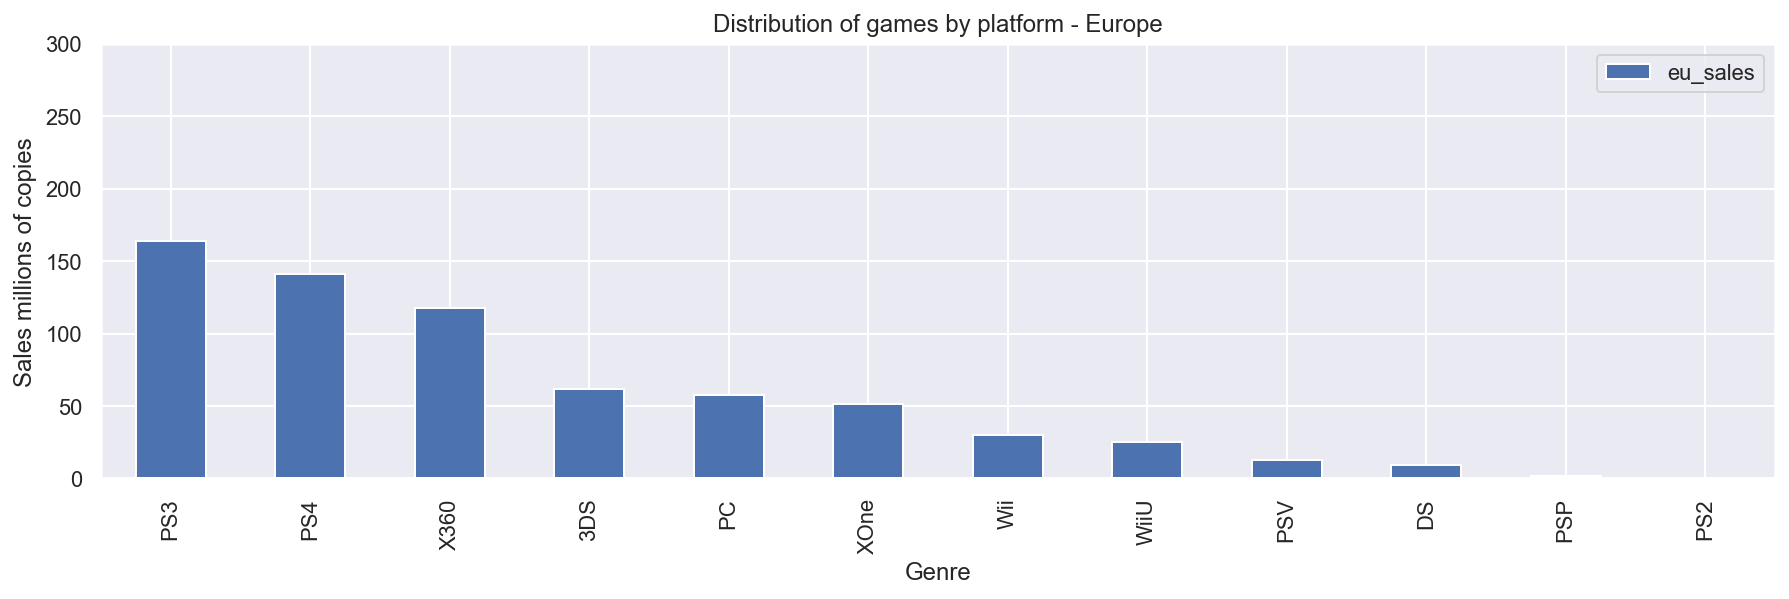

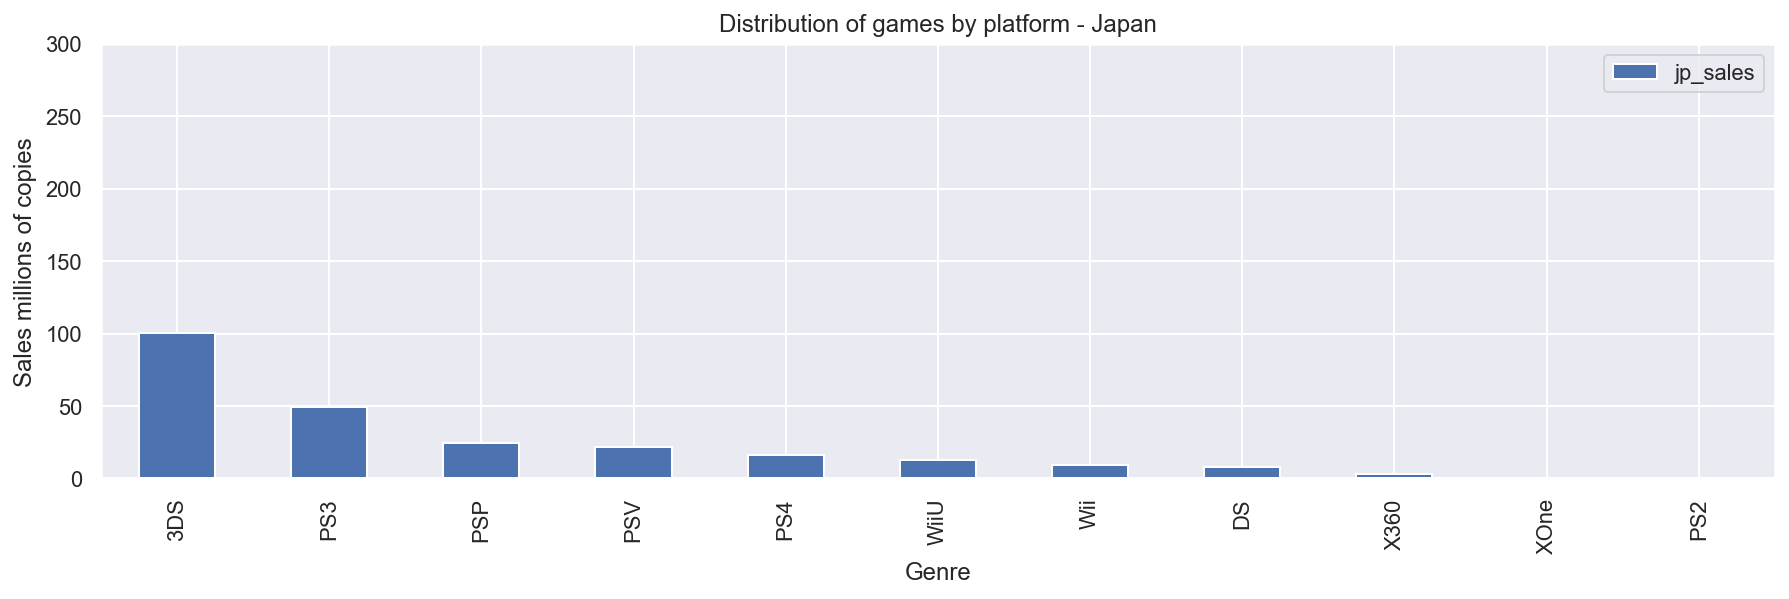

In [103]:
for region in top_platforms_region.keys():
    drawPlot(top_platforms_region[region],title=f'Distribution of games by platform - {region}', kind='bar'
             ,sizeMax=15,sizeMin=4,xlabel='Genre',ylabel='Sales millions of copies',ylimMax=300)

#### North America - top 5 popular platforms
1. Xbox 360
2. PS3
3. PS4
4. Xbox One
5. 3DS

In America, the most loved *Microsoft* (*Xbox 360*), followed by *Sony* (*PS3,PS4*), conclude the top 5 product *Microsoft Xbox One* and *Nintendo 3DS*.

#### Europe - top 5 popular platforms
1. PS3
2. PS4
3. Xbox 360
4. 3DS
5. PC

In Europe the leader is *Sony* (*PS3, PS4*), followed by *Microsoft* with *Xbox 360*, *Nintendo 3DS* and surprisingly in the top 5 is *PC*.

#### Japan - top 5 popular platforms
1. 3DS
2. PS3
3. PSP
4. PSV
5. PS4

In Japan, the situation is very different, *Microsoft* is less popular in the Japanese market. Japanese prefer domestic products such as *Nintendo 3DS*,*PS3*,*PSP*,*PSV*,*PS4*.

Consider genres

<a id="top_5_genres_regions"></a>
### Top 5 popular genres by region

Let's group the data by genre and sum up the sales.

In [104]:
na_users_genre = na_users.pivot_table(index='genre', values='na_sales',aggfunc='sum').sort_values(by='na_sales',ascending=False)
eu_users_genre = eu_users.pivot_table(index='genre', values='eu_sales',aggfunc='sum').sort_values(by='eu_sales',ascending=False)
jp_users_genre = jp_users.pivot_table(index='genre', values='jp_sales',aggfunc='sum').sort_values(by='jp_sales',ascending=False)
top_genres_regions = {
    "North America": na_users_genre,
    "Europe": eu_users_genre,
    "Japan": jp_users_genre
}

Let's plot the graphs

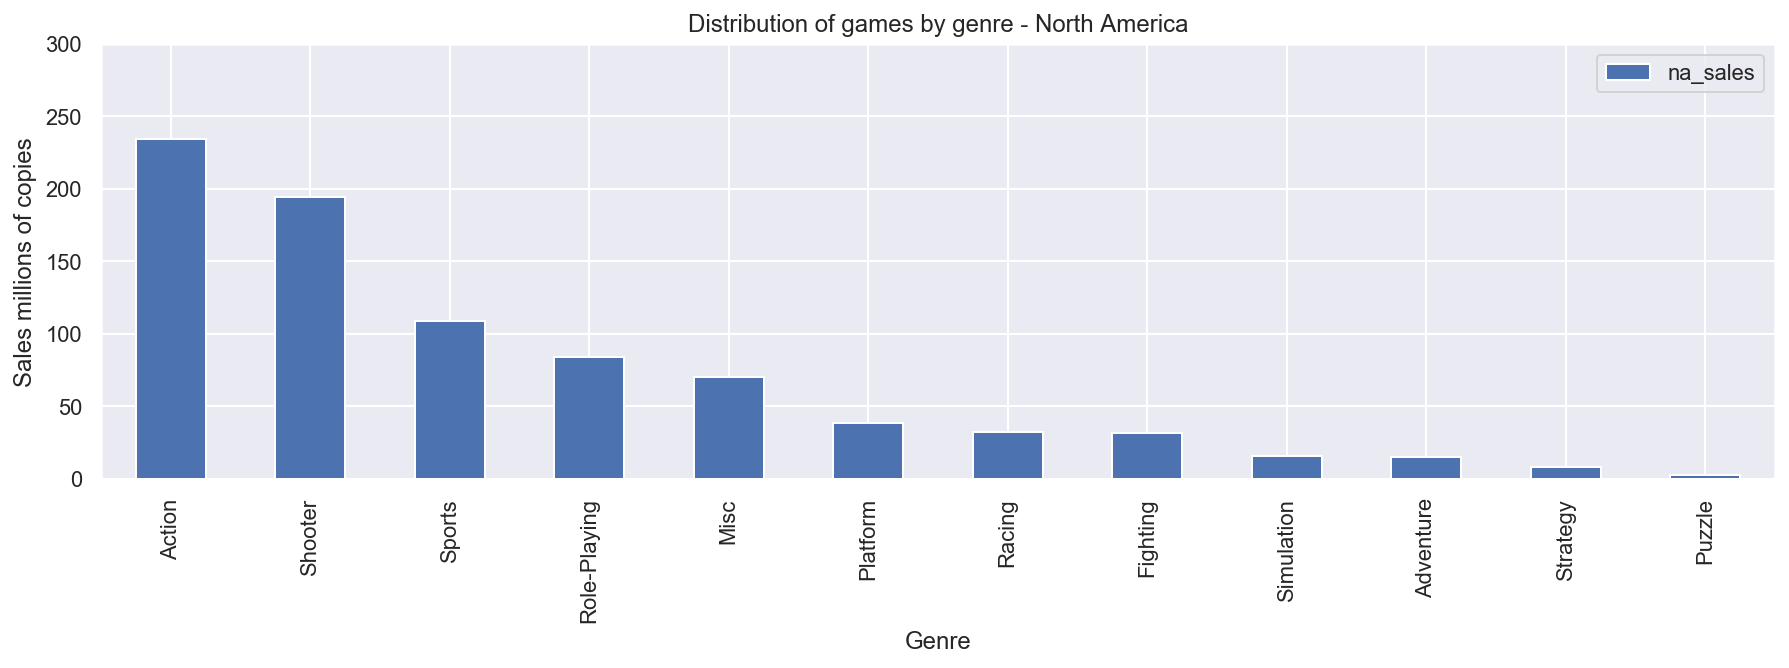

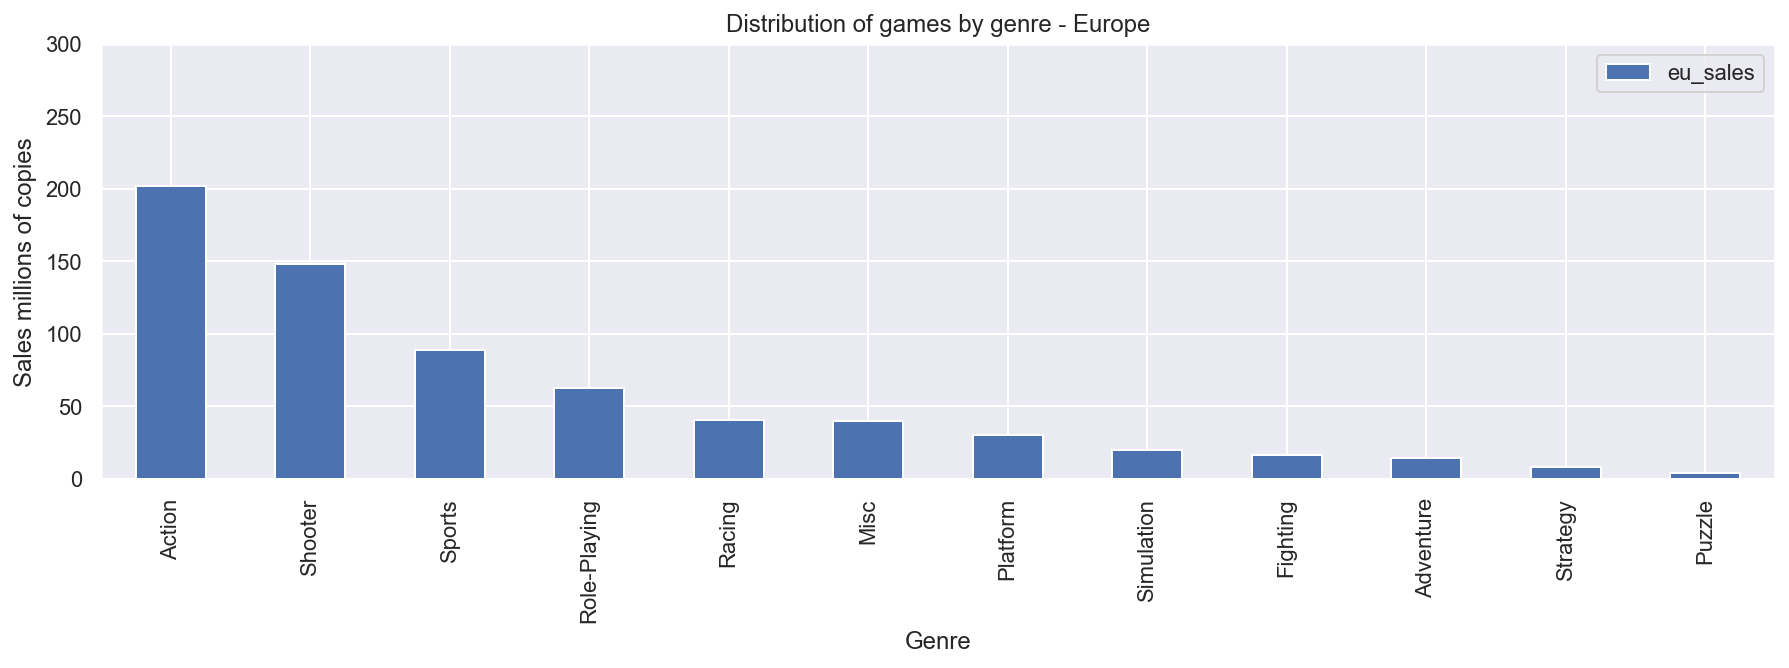

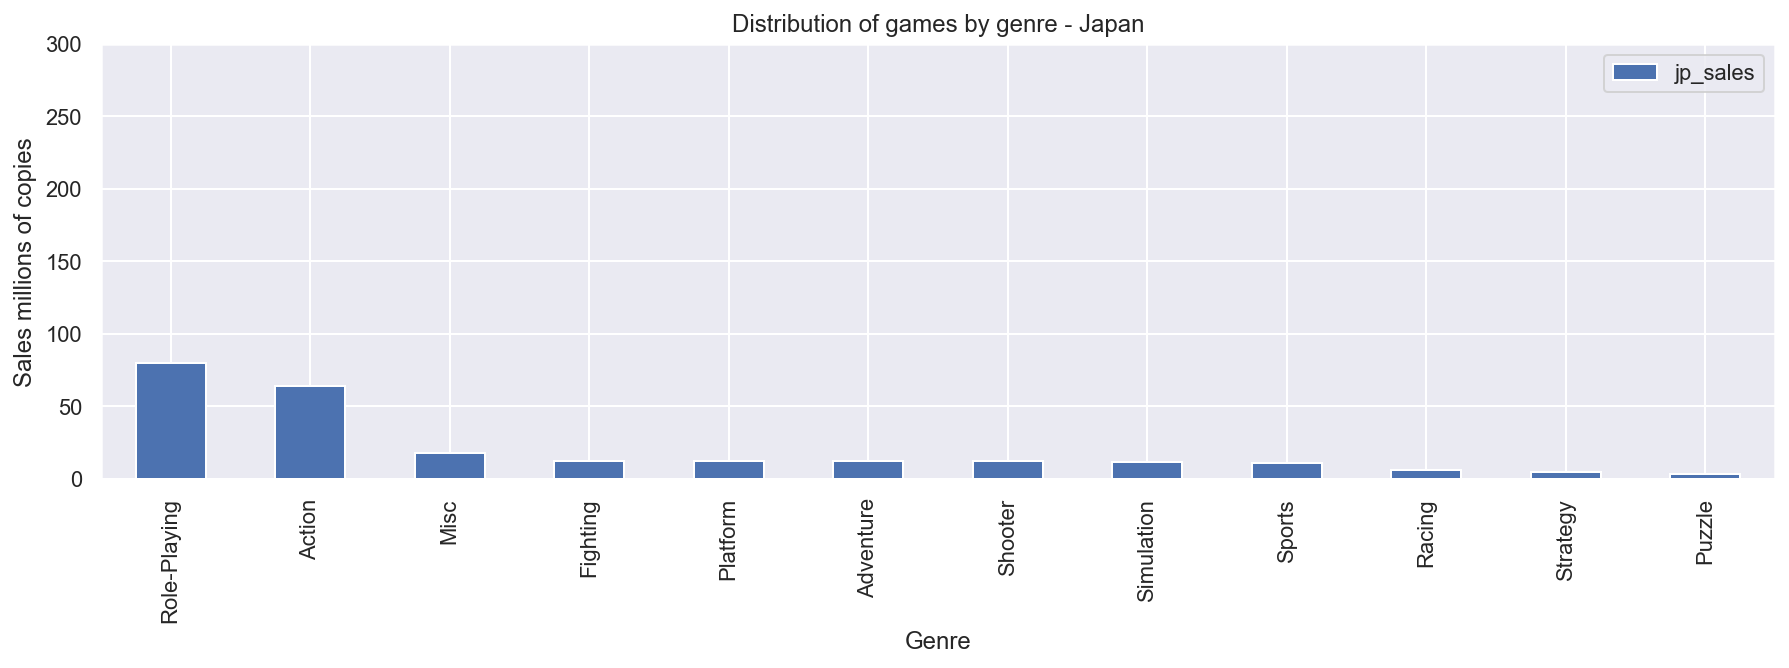

In [105]:
for region in top_genres_regions.keys():
    drawPlot(top_genres_regions[region],title=f'Distribution of games by genre - {region}', kind='bar'
             ,sizeMax=15,sizeMin=4,xlabel='Genre',ylabel='Sales millions of copies',ylimMax=300)

#### North America - top 5 popular genres
1. action
2. shooter
3. Sports
4. Role-Playing
5. Misc

The top 5 genres are *Action*. Genres: *Action*, *Shooter* and *Sports* are easy genres to learn. In the Western market, the most successful series of games in the *Action* and *Shooter* genres are Grand Theft Auto and Call of Duty. *Role-Playing* and *Misc* - close out the top 5 popular genres.

#### Europe - top 5 popular genres
1. action
2. shooter
3. Sports
4. Role-Playing
5. Racing

The top 5 is similar to the North American market. However, the genre that closes the top 5 is *Racing*. Europeans love to race.

#### Japan - top 5 popular genres
1. Role-Playing
2. Action
3.
4. Fighting
5. Adventure

The top 5 genre is *Role-Playing*. Most games have the *Role-Playing* genre. In Japan, there is a subgenre of *RPG* - *JRPG* https://en.wikipedia.org/wiki/List_of_best-selling_Japanese_role-playing_game_franchises. Japan is the home of such fighting game series as Street Fighter, Soul Calibur, Dead or alive. The Japanese game market is different because of the mentality of this region. Most domestic games are focused on the RPG genre. Japanese people prefer domestic games.

<a id="esrb_impact_sales"></a>
### Does the ESRB rating affect sales?

Let's see if the ESRB rating affects sales in individual regions.

1. RP - **-1** - game has not yet received final rating from ESRB.
2. EC - **0** - games with this rating contain content aimed at preschool audience.
3. E - **1** - games with this rating contain content that the ESRB believes is "generally appropriate for all ages."
4. K-A - **1** - same as E
5. E10+ - **2** - games with this rating contain content that the ESRB believes is generally appropriate for ages 10 and up.
6. T - **3** - Games with this rating contain content that the ESRB believes is generally appropriate for people age 13 and older
7. M - **4** - games with this rating contain content that the ESRB believes is generally appropriate for people age 17 and older.
8. A0 - **5** - Games with this rating contain content that the ESRB believes is only suitable for those aged 18 and older.

Since we have missing data in the rating, we need to process them. Let's see how many missing values there are in each data frame.

In [106]:
for df in [na_users,eu_users,jp_users]:
    checkMissingValues('rating',df)

rating check for missing values, number of rows with a missing value:  355
rating check for missing values, number of rows with a missing value:  457
rating check for missing values, number of rows with a missing value:  1118


Most of the information is lost if we take a sample without missing values. Consequently, it would be more logical to replace the missing values with "RP" (the game has not yet received the final rating from the ESRB).

In [107]:
for df in [na_users,eu_users,jp_users]:
    df['rating'] = df['rating'].fillna('RP')

#### North America

Let's graph the distribution of games for each age category. 

In [108]:
na_users_esrb_rating = na_users.pivot_table(index='rating',values='na_sales',aggfunc='sum').sort_values(by='na_sales',ascending=False)

In [109]:
na_users_esrb_rating

,na_sales
rating,
M,320.000
E,174.100
E10+,122.390
T,115.670
RP,101.010
EC,0.420


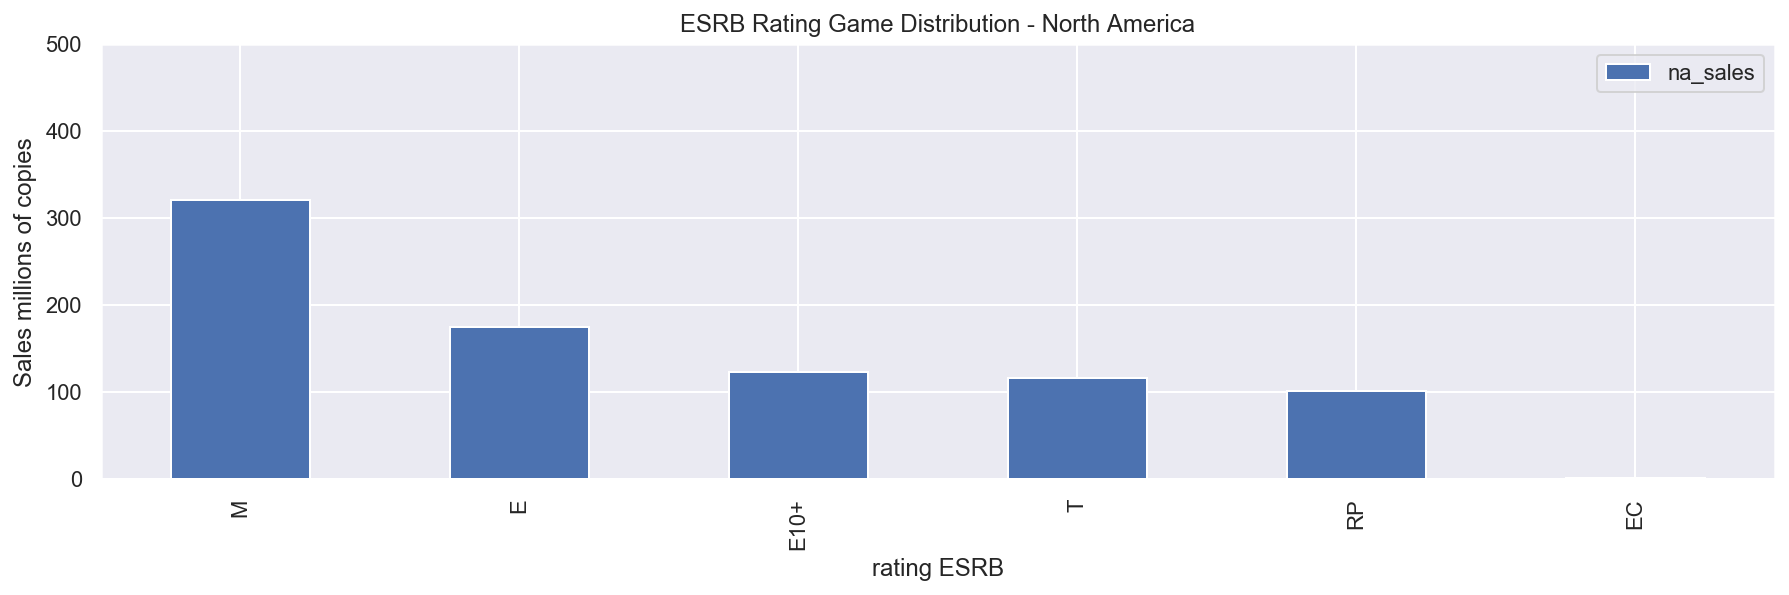

In [110]:
drawPlot(na_users_esrb_rating,title='ESRB Rating Game Distribution - North America', kind='bar'
             ,sizeMax=15,sizeMin=4,xlabel='rating ESRB',ylabel='Sales millions of copies',ylimMax=500)

The graph shows that most games are rated M (games with this rating contain content that, according to the ESRB, is generally suitable for ages 17 and older). Most popular games are rated M. For example, popular game series such as: *Grand Theft Auto*, *Call Of Duty*. The second place is occupied by the E-rating (games with this rating contain content that, according to the ESRB, is "generally suitable for all ages").  Note that there are games that are not rated by the ESRB.

#### Europe

Let's do the same for the region - Europe.

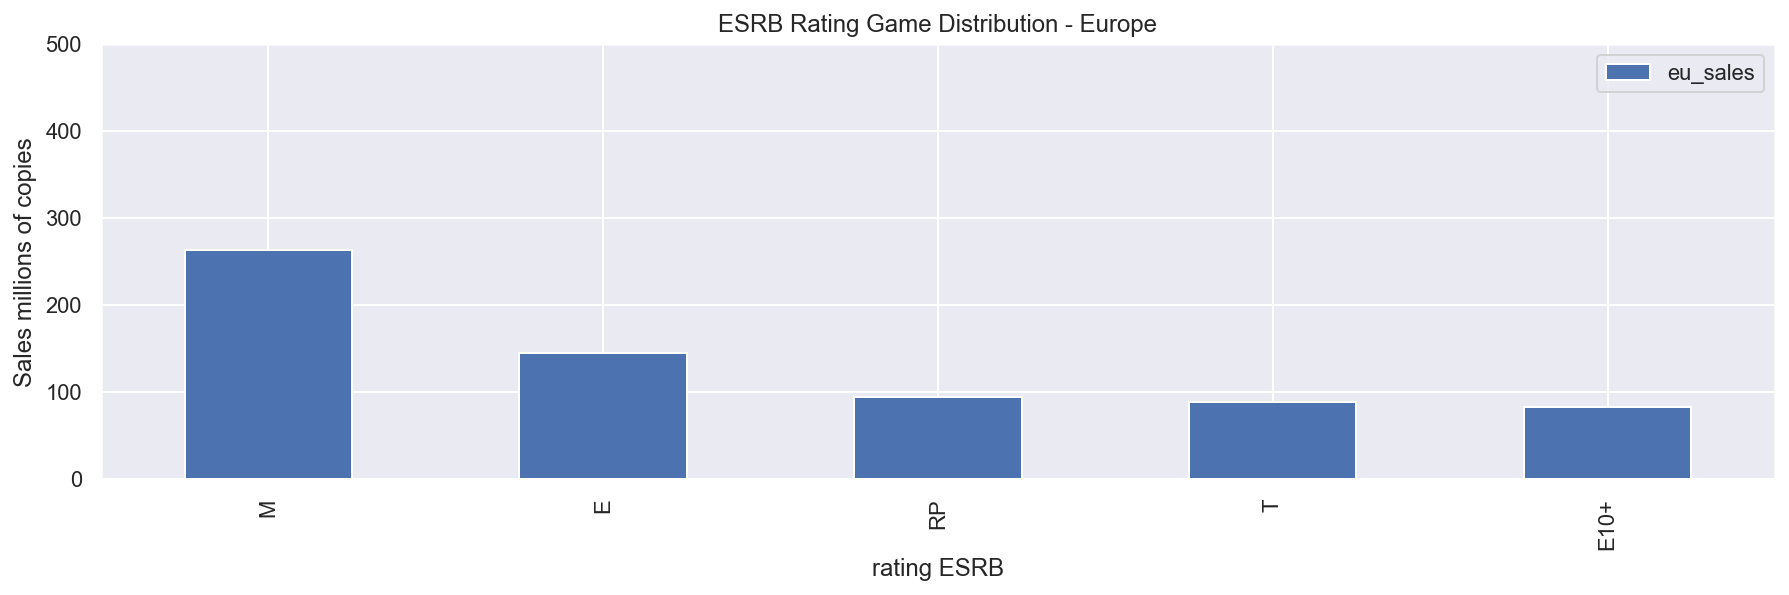

In [111]:
eu_users_esrb_rating = eu_users.pivot_table(index='rating',values='eu_sales',aggfunc='sum').sort_values(by='eu_sales',ascending=False)
drawPlot(eu_users_esrb_rating,title='ESRB Rating Game Distribution - Europe', kind='bar'
             ,sizeMax=15,sizeMin=4,xlabel='rating ESRB',ylabel='Sales millions of copies',ylimMax=500)

The graph is similar to the North American market, except the T and E10+ ratings have switched places. Also note that there are games that are not rated by the ESRB.

#### Japan

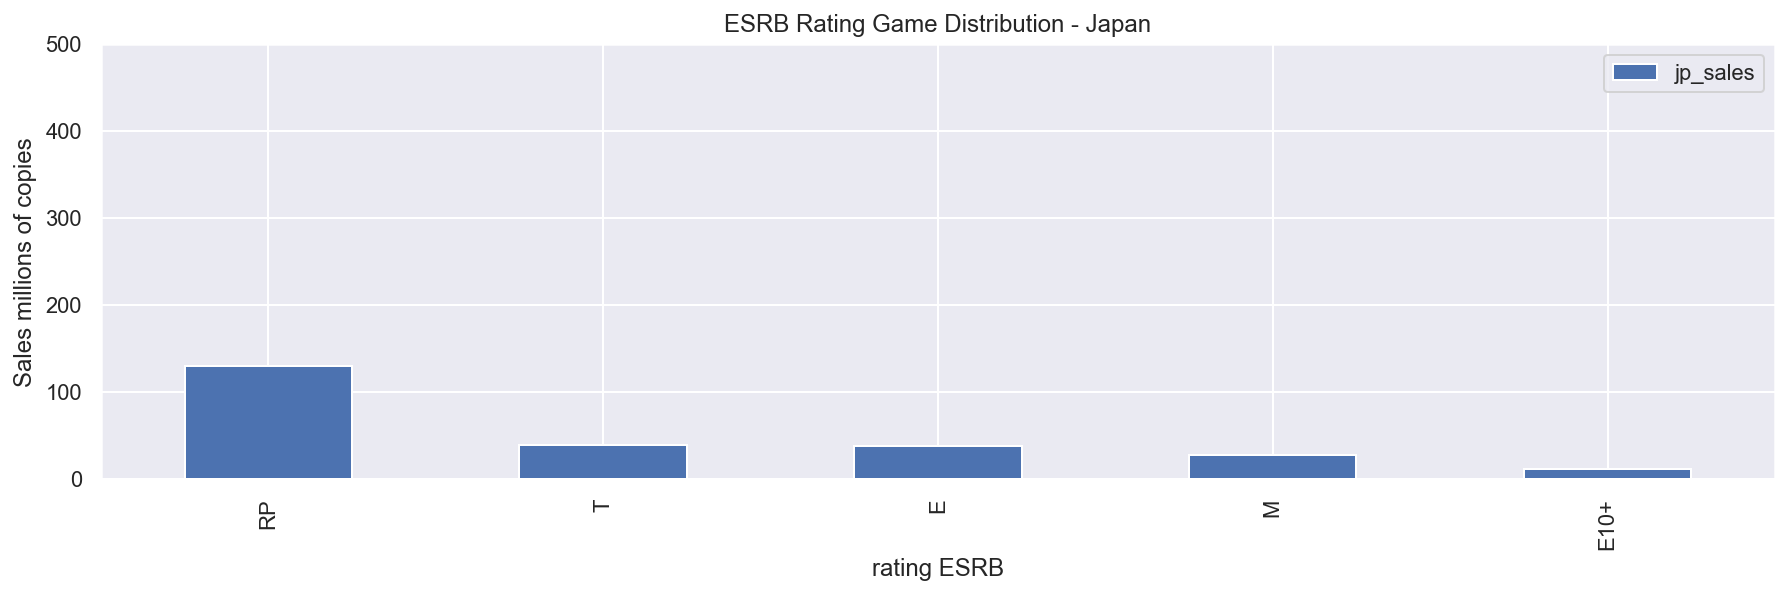

In [112]:
jp_users_esrb_rating = jp_users.pivot_table(index='rating',values='jp_sales',aggfunc='sum').sort_values(by='jp_sales',ascending=False)
drawPlot(jp_users_esrb_rating,title='ESRB Rating Game Distribution - Japan', kind='bar'
             ,sizeMax=15,sizeMin=4,xlabel='rating ESRB',ylabel='Sales millions of copies',ylimMax=500)

Most of the games were not rated by the ESRB. In games that have categories, the categories are about equal in the distribution of sales. It's probably because we don't have enough data for Japan. In Japan popular games with ratings T and E. 

Let's draw a general graph.

In [113]:
na_users_esrb_rating = na_users_esrb_rating.reset_index()
eu_users_esrb_rating = eu_users_esrb_rating.reset_index()
jp_users_esrb_rating = jp_users_esrb_rating.reset_index()
esrb_rating = na_users_esrb_rating.append(eu_users_esrb_rating,ignore_index=True,sort=False)
esrb_rating = esrb_rating.append(jp_users_esrb_rating,ignore_index=True,sort=False)

In [114]:
esrb_rating = esrb_rating.reset_index(drop=True)
esrb_rating_pivot = esrb_rating.pivot_table(index='rating',values=['na_sales','eu_sales','jp_sales'],aggfunc='sum')
esrb_rating_pivot = esrb_rating_pivot.reset_index().sort_values(by=['na_sales','eu_sales','jp_sales'],ascending=False)

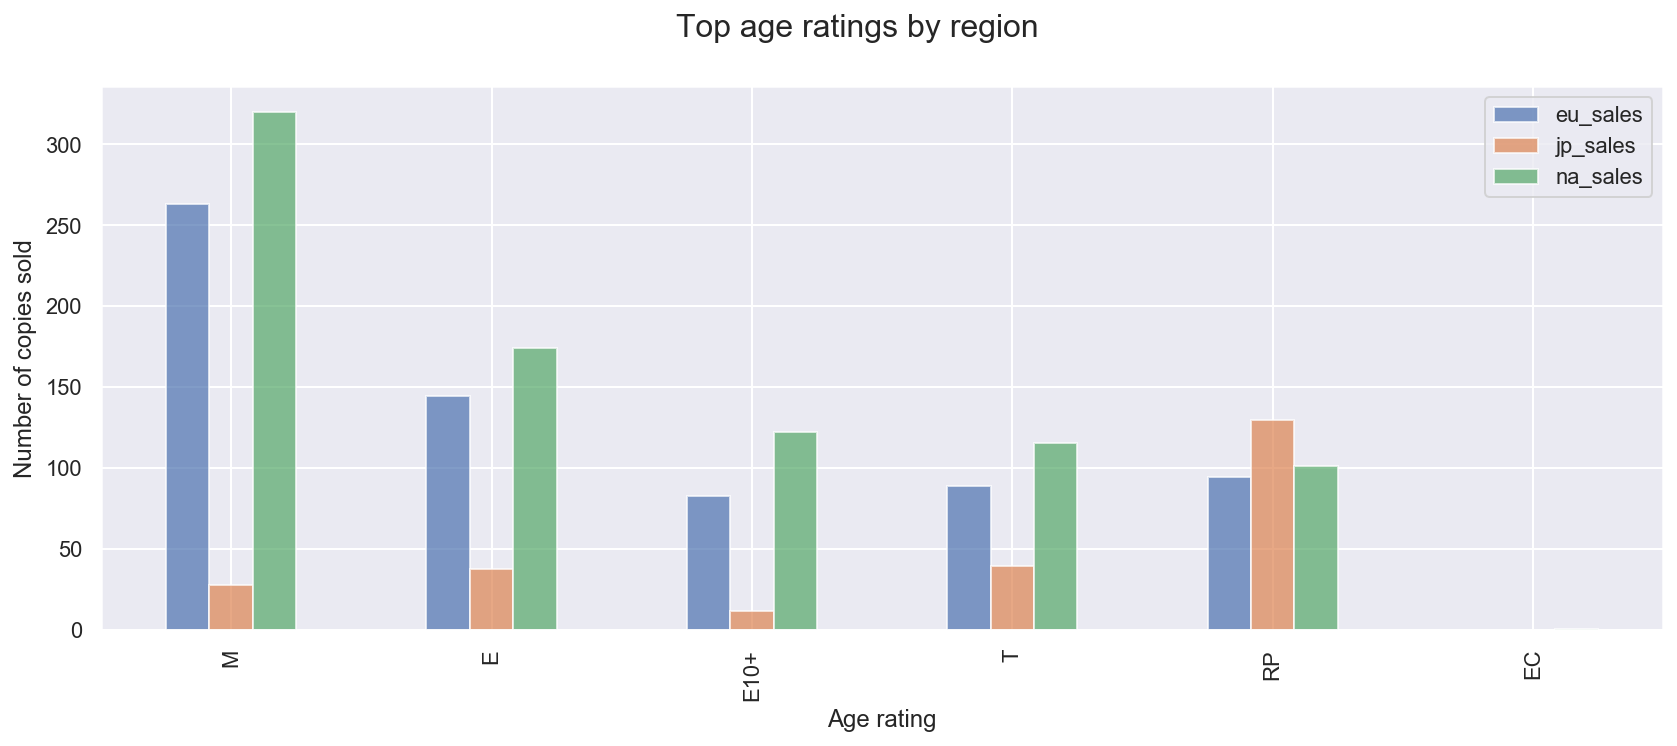

In [115]:
esrb_rating_pivot.plot(x='rating', kind='bar',alpha=.7);
plt.suptitle('Top age ratings by region')
plt.ylabel('Number of copies sold')
plt.xlabel('Age rating')
plt.show()

Based on the charts, we can conclude that the ESRB rating affects sales. Most AAA projects are rated *M*.  The most popular game is *Grand Theft Auto 5* has an age rating of *M* (there is more interesting content there than in games with an age rating of E.). The most popular age rating is M (games with this rating contain content which, according to the ESRB, is generally suitable for people aged 17 and older). The 2nd most popular rating is E (games with this rating contain content that the ESRB believes is "generally suitable for all ages"). We can conclude that a game must have an age rating of **M** in order to be successful.

## Summary

At the stage of statistical data analysis we have defined a portrait of the user of each region, highlighted the top 5 popular platforms and the top 5 popular genres.
#### North America - top 5 popular platforms
1. Xbox 360
2. PS3
3. PS4
4. Xbox One
5. 3DS

In America, the most loved *Microsoft* (*Xbox 360*), followed by *Sony* (*PS3,PS4*), conclude the top 5 product *Microsoft Xbox One* and *Nintendo 3DS*.

#### Europe - top 5 popular platforms
1. PS3
2. PS4
3. Xbox 360
4. 3DS
5. PC

In Europe the leader is *Sony* (*PS3, PS4*), followed by *Microsoft* with *Xbox 360*, *Nintendo 3DS* and surprisingly in the top 5 is *PC*.

#### Japan - top 5 popular platforms
1. 3DS
2. PS3
3. PSP
4. PSV
5. PS4

In Japan, the situation is very different, *Microsoft* is less popular in the Japanese market. Japanese prefer domestic products such as *Nintendo 3DS*,*PS3*,*PSP*,*PSV*,*PS4*.

#### North America - top 5 popular genres
1. action
2. shooter
3. Sports
4. Role-Playing
5. Misc

The top 5 genres are *Action*. Genres: *Action*, *Shooter* and *Sports* are easy genres to learn. In the Western market, the most successful series of games in the *Action* and *Shooter* genres are Grand Theft Auto and Call of Duty. *Role-Playing* and *Misc* - close out the top 5 popular genres.

#### Europe - top 5 popular genres
1. action
2. shooter
3. Sports
4. Role-Playing
5. Racing

The top 5 is similar to the North American market. However, the genre that closes the top 5 is *Racing*. Europeans love to race.

#### Japan - top 5 popular genres
1. Role-Playing
2. Action
3.
4. Fighting
5. Adventure

The top 5 genre is *Role-Playing*. Most games have the *Role-Playing* genre. In Japan, there is a subgenre of *RPG* - *JRPG* https://en.wikipedia.org/wiki/List_of_best-selling_Japanese_role-playing_game_franchises. Japan is the home of such fighting game series as Street Fighter, Soul Calibur, Dead or alive. The Japanese game market is different because of the mentality of this region. Most domestic games are focused on the RPG genre. Japanese people prefer domestic games.

We found that the ESRB rating affects sales in certain regions. he most popular age rating is M (games with this rating contain content which, according to the ESRB, is generally suitable for people aged 17 and older). The 2nd most popular rating is E (games with this rating contain content that the ESRB believes is "generally suitable for all ages"). We can conclude that a game must have an age rating of **M** in order to be successful.

<br>

---

<a id="hypotheses"></a>
# Stage 5 - Hypotheses test

At this stage, we need to test several hypotheses:
1. The average user ratings of Xbox One and PC platforms are equal
2. Average user ratings of *Action* and *Sports* genres are different

<a id="averageUserScore_XOne_PC"></a>
##  Average user ratings for Xbox One and PC platforms are equal

To test the hypothesis, let's take the general population of *Xbox One* platform users. We will also take the general population of *PC* platform users.

In [116]:
xbox_one_users = xboxOne_sales_2011.reset_index(drop=True)
pc_users = games_stats_2011.query('platform == "PC"').reset_index(drop=True)

We begin by formulating the null hypothesis H₀ **"the average user ratings of the Xbox One and PC platforms are equal "**. Based on H₀ we formulate the alternative hypothesis H₁ **"the average user ratings of Xbox One and PC platforms are different "**.

Before testing our hypotheses, we need to make sure that the variances are homogeneous.To test the assumption of homogeneity of variances, we use the Levene test. Let us formulate the null hypothesis H₀ in Levene's test **"both samples have the same variance "**.  Based on H₀ we formulate the alternative hypothesis H₁ **"the variance in the samples is different "**.

We use the `levene()` method from the *scipy* library to check the homogeneity of the variances.

In [117]:
# Set the critical level of statistical significance
alpha = 0.05 # common threshold
# Filter the values, since there are missing values. Also remove the rows where the rating was not defined
xbox_users_score_non_nan = non_nan_column(xbox_one_users,'user_score').query('user_score > 0')
pc_users_score_non_nan = non_nan_column(pc_users,'user_score').query('user_score > 0')
xbox_one_users_score = xbox_users_score_non_nan['user_score']
pc_users_score = pc_users_score_non_nan['user_score']
results = st.levene(xbox_one_users_score,pc_users_score,center='mean')
print('p value:', results.pvalue)

if(results.pvalue < alpha):
    print('Reject null hypothesis')
else:
    print('Impossible to reject the null hypothesis')

p value: 0.0003135793614668444
Reject null hypothesis


P value is less than the threshold value (alpha). Consequently, the variance in the samples is different.

Let's perform a statistical test (t-test).We will use the method `scipy.stats.ttest_ind` from the library *scipy*. Let's compare two general populations (*Xbox One* platform users and *PC* platform users). Note that the variance of the two samples is different, so let's set equal_var to False.

In [118]:
# Set the critical level of statistical significance
alpha = 0.05 # common threshold
results = st.ttest_ind(xbox_one_users_score,pc_users_score,equal_var=False)
print('p value:', results.pvalue)

if(results.pvalue < alpha):
    print('Reject null hypothesis')
else:
    print('Impossible to reject the null hypothesis')

p value: 0.8805124325191567
Impossible to reject the null hypothesis


Empirically obtained data does not contradict the null hypothesis. The average user ratings of Xbox One and PC platforms are equal. 

Check another hypothesis

<a id="averageUserScore_Action_Sports"></a>
## Average user ratings for Action and Sports genres are different

To test the hypothesis, let's take the general population of the *Action* genre. We will also take the general population of the *Sports* genre.

In [119]:
action_genre = games_stats_2011.query('genre == "Action"').reset_index(drop=True)
sports_genre = games_stats_2011.query('genre == "Sports"').reset_index(drop=True)

As in the first hypothesis test, we must first test for homogeneity of variances from the obtained samples. Let us use the Levene test. We will formulate the null hypothesis H₀ in Levene's test **"both samples have the same variance "**.  Based on H₀ we will formulate the alternative hypothesis H₁ **"the variance in the samples is different "**.

In [120]:
# Set the critical level of statistical significance
alpha = 0.05 # common threshold
# Filter the values, since there are missing values. Also remove the rows where the rating was not defined
action_users_score_non_nan = non_nan_column(action_genre,'user_score').query('user_score > 0')
sports_users_score_non_nan = non_nan_column(sports_genre,'user_score').query('user_score > 0')
action_users_score = action_users_score_non_nan['user_score']
sports_users_score = sports_users_score_non_nan['user_score']

results = st.levene(action_users_score,sports_users_score,center='mean')
print('p value:', results.pvalue)

if(results.pvalue < alpha):
    print('Reject null hypothesis')
else:
    print('Impossible to reject the null hypothesis')

p value: 3.9772510109800373e-25
Reject null hypothesis


P value is less than the threshold value (alpha). Consequently, the variance in the samples is different.

Formulate the null hypothesis H₀ **"the average user ratings of Action and Sports are equal "**. Based on H₀ we formulate the alternative hypothesis H₁ **"the average user ratings of Action and Sports are different "**.

Let's perform a statistical test (t-test) using the method `scipy.stats.ttest_ind` from the *scipy* library. Note that the variance of the two samples is different, pass the value *False* to the *equal_var* parameter.

In [121]:
# Set the critical level of statistical significance
alpha = 0.05 # common threshold
results = st.ttest_ind(action_users_score,sports_users_score,equal_var=False)
print('p value:', results.pvalue)

if(results.pvalue < alpha):
    print('Reject null hypothesis')
else:
    print('Impossible to reject the null hypothesis')

p value: 2.50925055138252e-25
Reject null hypothesis


Based on the p-value(**0%** *probability of getting the result that the average ratings of Action and Sports genres are equal*), we can conclude that the average user ratings of *Action* and *Sports* genres are different.

## Summary

We tested the hypotheses using statistical testing. The hypotheses we tested were:
1. The average user ratings of Xbox One and PC platforms are equal - the test passed. There is a probability of 88%, empirically obtained data does not contradict the null hypothesis. The average user ratings of Xbox One and PC platforms are equal. 
2. Average user ratings for *Action* and *Sports* genres are different - passed the test. Average user ratings of Action and Sports genres are different.

<br>

---

<a id="results"></a>
# Stage 6 - Results

In the project, we have identified patterns that determine the success of the game:

At the stage of statistical data analysis, we have defined a portrait of the user of each region, highlighted the top 5 popular platforms and the top 5 popular genres.
#### North America - top 5 popular platforms
1. Xbox 360
2. PS3
3. PS4
4. Xbox One
5. 3DS

In America, the most loved *Microsoft* (*Xbox 360*), followed by *Sony* (*PS3,PS4*), conclude the top 5 product *Microsoft Xbox One* and *Nintendo 3DS*.

#### Europe - top 5 popular platforms
1. PS3
2. PS4
3. Xbox 360
4. 3DS
5. PC

In Europe the leader is *Sony* (*PS3, PS4*), followed by *Microsoft* with *Xbox 360*, *Nintendo 3DS* and surprisingly in the top 5 is *PC*.

#### Japan - top 5 popular platforms
1. 3DS
2. PS3
3. PSP
4. PSV
5. PS4

In Japan, the situation is very different, *Microsoft* is less popular in the Japanese market. Japanese prefer domestic products such as *Nintendo 3DS*,*PS3*,*PSP*,*PSV*,*PS4*.

#### North America - top 5 popular genres
1. action
2. shooter
3. Sports
4. Role-Playing
5. Misc

The top 5 genres are *Action*. Genres: *Action*, *Shooter* and *Sports* are easy genres to learn. In the Western market, the most successful series of games in the *Action* and *Shooter* genres are Grand Theft Auto and Call of Duty. *Role-Playing* and *Misc* - close out the top 5 popular genres.

#### Europe - top 5 popular genres
1. action
2. shooter
3. Sports
4. Role-Playing
5. Racing

The top 5 is similar to the North American market. However, the genre that closes the top 5 is *Racing*. Europeans love to race.

#### Japan - top 5 popular genres
1. Role-Playing
2. Action
3.
4. Fighting
5. Adventure

The top 5 genre is *Role-Playing*. Most games have the *Role-Playing* genre. In Japan, there is a subgenre of *RPG* - *JRPG* https://en.wikipedia.org/wiki/List_of_best-selling_Japanese_role-playing_game_franchises. Japan is the home of such fighting game series as Street Fighter, Soul Calibur, Dead or alive. The Japanese game market is different because of the mentality of this region. Most domestic games are focused on the RPG genre. Japanese people prefer domestic games.

We found that the ESRB rating affects sales in certain regions. he most popular age rating is M (games with this rating contain content which, according to the ESRB, is generally suitable for people aged 17 and older). The 2nd most popular rating is E (games with this rating contain content that the ESRB believes is "generally suitable for all ages"). We can conclude that a game must have an age rating of **M** in order to be successful.

We tested the hypotheses using statistical testing. The hypotheses we tested were:
1. The average user ratings of Xbox One and PC platforms are equal - the test passed. There is a probability of 88%, empirically obtained data does not contradict the null hypothesis. The average user ratings of Xbox One and PC platforms are equal. 
2. Average user ratings for *Action* and *Sports* genres are different - passed the test. Average user ratings of Action and Sports genres are different.

### Metrics that determine the success of the game:
1. the relevance of the platform for which the game was released. 
2. Leading platforms and large corporations leading the game industry.
3. The game must be played on next gen consoles.
4. Critics reviews partly influence sales.
5. For success - games must be rated *M*.
6. The genre of the game should be easy to learn and popular. 
7. Geomarketing, it is necessary to take into account regions, as tastes of people from different regions are different.

#### Recommendations for further actions:
Based on the metrics that determine the success of the game, you can make recommendations for further action. Online game store needs to find a game that will meet the metrics above: 
1. platform relevance - the game should be fresh, released for next generation consoles(*PS4*,*Xbox One*).
2) Leading Platforms - the game must be released for popular platforms such as: *PS4*,*Xbox One*.
3) Critics' opinions should be taken into consideration when choosing a game. Look at reviews from youtubers-gamers for example. 
4. Most popular games have an age rating of *M*. The most popular game is *Grand Theft Auto 5*. Consequently, you need to take this indicator into account.
5. The genre of the game should be easy to learn and popular. Popular genres: *Action*,*Shooter* The most successful series of games of the genres *Action* and *Shooter* are AAA projects: *Grand Theft Auto and Call of Duty*. 
6. It is worth paying attention to the geolocation of users. Each region has different tastes. For example, the Japanese game market is different because of the mentality of that region. Most domestic games are focused on the RPG genre. The Japanese prefer domestic games, they also prefer domestic products such as *Nintendo 3DS*,*PS3*,*PSP*,*PSV*,*PS4*.